## Methodology
We evaluated the vision capabilities of the GPT-4o language model (identifier gpt-4o-2024-05-13) using a series of tasks that assess its performance on visual understanding and reasoning. For each task, a dataset of approximately 100 representative images was curated.

The model was provided an image along with a text prompt specifying the desired output format. The prompts were designed to probe the model's ability to identify, classify, describe, and analyze visual content without additional context. For select tasks, we further investigated the model's few-shot learning capabilities by providing a small number of labeled examples before the query image.

Model outputs were compared against ground truth labels to compute standard performance metrics such as accuracy. Qualitative analysis was also conducted on a subset of responses to identify common failure modes and strengths. The results across different tasks provide insights into GPT-4o's current visual understanding capabilities, areas for improvement, and potential as a foundation model for vision tasks.

Subsequent sections delve into the specifics of each task, dataset, and findings, offering a comprehensive evaluation of GPT-4o's visual reasoning skills and informing future research directions for large language models applied to multimodal tasks.



## Fruits

The Fruits Images Dataset consists of approximately 400 images spanning 10 different fruit classes: Banana, Jackfruit, Mango, Litchi, Hog Plum, Papaya, Grapes, Apple, Orange, and Guava. Each fruit class has 40 labeled images, with the dataset split into 320 training images and 80 test images. The images were collected from various internet sources such as Google Images and stock image websites, and were labeled by the dataset creators. For this evaluation, the model was provided an image along with a prompt to identify the fruit class from the list of 10 classes in a specified format. Model predictions were compared against ground truth labels to assess performance.

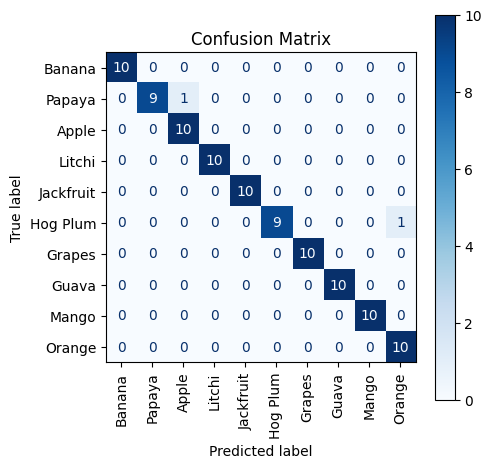

In [11]:
import pandas as pd

# Load the data
data_path = "01-Fruit-high-setting.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and its columns to verify structure
data.head(), data.columns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Extract the ground truth and prediction columns
ground_truth = data['1']
predictions = data['# of Shots 0']

# Generate the confusion matrix
cm = confusion_matrix(ground_truth, predictions, labels=pd.unique(data['1']))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pd.unique(data['1']))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
ax.set_title('Confusion Matrix')
plt.show()


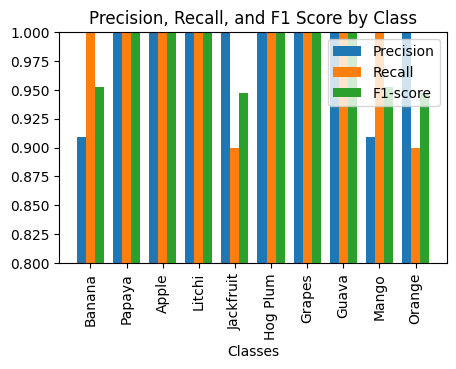

In [3]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "01-Fruit.csv"
data = pd.read_csv(data_path)

# Extract ground truth and predictions
# Extract the ground truth and prediction columns
ground_truth = data['1']
predictions = data['# of Shots 0']
# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(ground_truth, predictions, average=None)

# Plot setup
fig, ax = plt.subplots(figsize=(5, 3))
index = np.arange(len(pd.unique(data['1'])))
bar_width = 0.25

# Bar plots
ax.bar(index, precision, bar_width, label='Precision')
ax.bar(index + bar_width, recall, bar_width, label='Recall')
ax.bar(index + 2*bar_width, f1, bar_width, label='F1-score')

# Labeling and aesthetics
ax.set_xlabel('Classes')
ax.set_title('Precision, Recall, and F1 Score by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(pd.unique(data['1']), rotation=90)
ax.set_ylim(0.8, 1)  # Adjust y-axis
ax.legend()

plt.show()


In [7]:
import pandas as pd

# Load the data
data_path = "01-Fruit.csv"
data = pd.read_csv(data_path)

# Extract the ground truth and prediction columns
ground_truth = data['1']
predictions = data['# of Shots 0']

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(ground_truth, predictions, average=None)

# Create a DataFrame with the results
result_df = pd.DataFrame({
    'Class': pd.unique(data['1']),
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Print the DataFrame
print(result_df)

       Class  Precision  Recall  F1-Score
0     Banana   0.909091     1.0  0.952381
1     Papaya   1.000000     1.0  1.000000
2      Apple   1.000000     1.0  1.000000
3     Litchi   1.000000     1.0  1.000000
4  Jackfruit   1.000000     0.9  0.947368
5   Hog Plum   1.000000     1.0  1.000000
6     Grapes   1.000000     1.0  1.000000
7      Guava   1.000000     1.0  1.000000
8      Mango   0.909091     1.0  0.952381
9     Orange   1.000000     0.9  0.947368


The model demonstrated strong performance in classifying the 10 different fruit classes, achieving high precision, recall, and F1-scores across most classes. Several classes, including Papaya, Apple, Litchi, Hog Plum, Grapes, and Guava, obtained perfect scores of 1.0 for precision, recall, and F1-score. The Banana and Mango classes had slightly lower but still impressive precision scores of 0.909091, with perfect recall of 1.0. Jackfruit and Orange classes had precision scores of 1.0, but slightly lower recall scores of 0.9, resulting in F1-scores of 0.947368. Overall, the model exhibited remarkable accuracy in recognizing and distinguishing the visual characteristics of these fruit categories.

# Drowsy

The Drowsy Detection Dataset consists of images extracted from videos capturing drivers in three distinct states: natural, fatigued, and drowsy. The dataset was curated by gathering relevant videos, converting them into image frames, and applying facial detection algorithms to isolate key facial regions like eyes, mouth, and cheeks, which are indicative of drowsiness. The extracted images were converted to grayscale, resized to 48x48 pixels, and accurately labeled based on the driver's state. The dataset comprises two classes: 'DROWSY' and 'NATURAL', with a total of 100 labeled images sampled evenly from each class. For this evaluation, GPT-4o was provided an image along with a prompt to classify it into one of the two classes in a specified JSON format. The model's predictions were compared against the ground truth labels to assess its performance in detecting driver drowsiness from facial features.

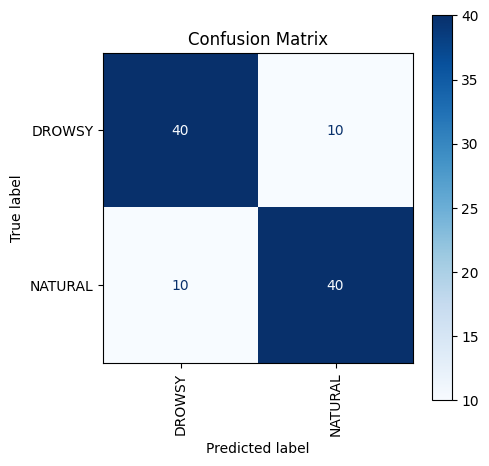

In [17]:
import pandas as pd

# Load the data
data_path = "02-Drowsy.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and its columns to verify structure
data.head(), data.columns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Extract the ground truth and prediction columns
ground_truth = data['1']
predictions = data['# of Shots 0']

# Generate the confusion matrix
cm = confusion_matrix(ground_truth, predictions, labels=pd.unique(data['1']))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pd.unique(data['1']))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
ax.set_title('Confusion Matrix')
plt.show()

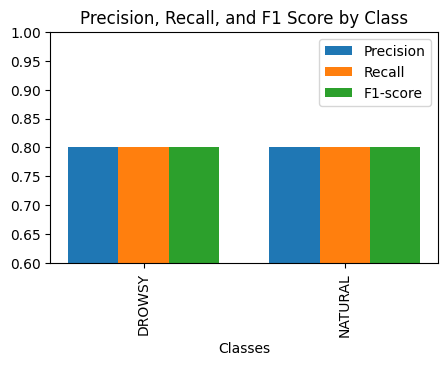

,Class,Precision,Recall,F1-Score
0,DROWSY,0.8,0.8,0.8
1,NATURAL,0.8,0.8,0.8


In [27]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "02-Drowsy.csv"
data = pd.read_csv(data_path)

# Extract ground truth and predictions
# Extract the ground truth and prediction columns
ground_truth = data['1']
predictions = data['# of Shots 0']
# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(ground_truth, predictions, average=None)

# Plot setup
fig, ax = plt.subplots(figsize=(5, 3))
index = np.arange(len(pd.unique(data['1'])))
bar_width = 0.25

# Bar plots
ax.bar(index, precision, bar_width, label='Precision')
ax.bar(index + bar_width, recall, bar_width, label='Recall')
ax.bar(index + 2*bar_width, f1, bar_width, label='F1-score')

# Labeling and aesthetics
ax.set_xlabel('Classes')
ax.set_title('Precision, Recall, and F1 Score by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(pd.unique(data['1']), rotation=90)
ax.set_ylim(0.6, 1)  # Adjust y-axis
ax.legend()

plt.show()

result_df = pd.DataFrame({
    'Class': pd.unique(data['1']),
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Print the DataFrame
(result_df)

# crop

The Crop Disease Classification Dataset is a comprehensive collection of images aimed at evaluating GPT-4o's capabilities in identifying crop diseases. The dataset encompasses 20 distinct classes of common crop diseases: Blight, Downy Mildew, Apple Scab, Cedar Apple Rust, Blossom End Rot, Fire Blight, Verticillium, Fusarium, Canker, Gray Mold, Botrytis, Powdery Mildew, Nematodes, Black Spot, Leaf Spots, Anthracnose, Mosaic Virus, Brown Rot, Crown Gall, and Clubroot. For this evaluation, a total of 100 images were sampled from the dataset, with each class represented by approximately 5 images. GPT-4o was provided these images along with a prompt to classify the crop disease depicted in each image. The model's predictions were compared against the ground truth labels to assess its performance in accurately identifying and distinguishing various crop diseases based solely on visual information.

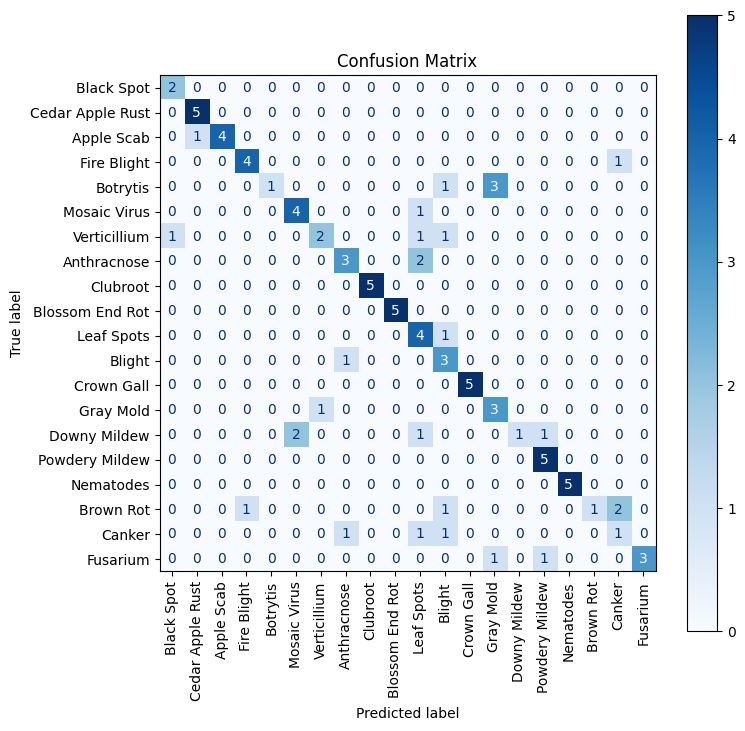

In [20]:
import pandas as pd

# Load the data
data_path ="03-Crop.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and its columns to verify structure
data.head(), data.columns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Extract the ground truth and prediction columns
ground_truth = data['1'].astype('str')
predictions = data['# of Shots 0'].astype('str')

# Generate the confusion matrix
cm = confusion_matrix(ground_truth, predictions, labels=pd.unique(data['1']))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pd.unique(data['1']))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
ax.set_title('Confusion Matrix')
plt.show()

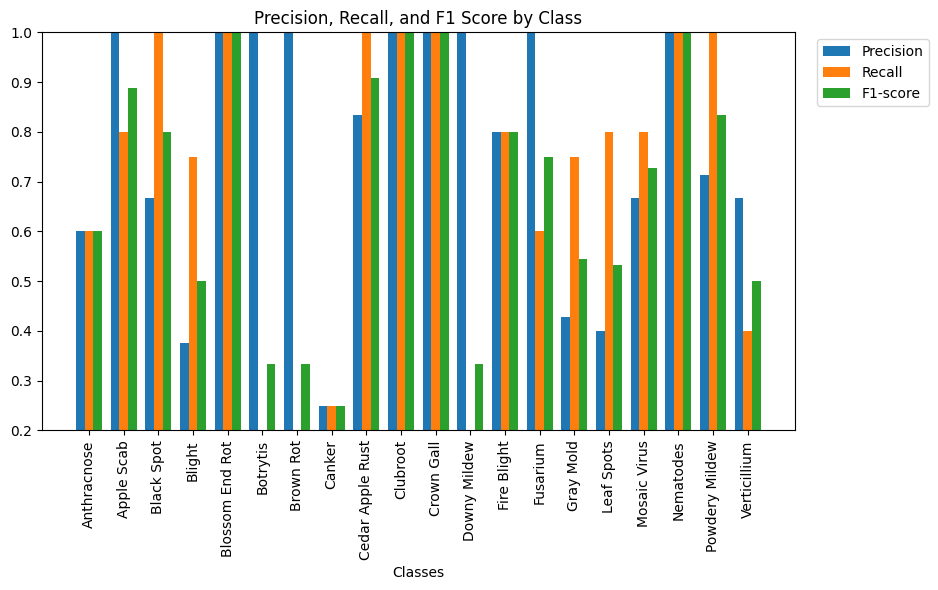

               Class  Precision  Recall  F1-score
0        Anthracnose   0.600000    0.60  0.600000
1         Apple Scab   1.000000    0.80  0.888889
2         Black Spot   0.666667    1.00  0.800000
3             Blight   0.375000    0.75  0.500000
4    Blossom End Rot   1.000000    1.00  1.000000
5           Botrytis   1.000000    0.20  0.333333
6          Brown Rot   1.000000    0.20  0.333333
7             Canker   0.250000    0.25  0.250000
8   Cedar Apple Rust   0.833333    1.00  0.909091
9           Clubroot   1.000000    1.00  1.000000
10        Crown Gall   1.000000    1.00  1.000000
11      Downy Mildew   1.000000    0.20  0.333333
12       Fire Blight   0.800000    0.80  0.800000
13          Fusarium   1.000000    0.60  0.750000
14         Gray Mold   0.428571    0.75  0.545455
15        Leaf Spots   0.400000    0.80  0.533333
16      Mosaic Virus   0.666667    0.80  0.727273
17         Nematodes   1.000000    1.00  1.000000
18    Powdery Mildew   0.714286    1.00  0.833333


In [19]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "03-Crop.csv"
data = pd.read_csv(data_path)

# Extract the ground truth and prediction columns
ground_truth = data['1'].astype(str)
predictions = data['# of Shots 0'].astype(str)

# Get the unique classes present in the ground truth
classes = np.unique(ground_truth)

# Create a dictionary to map ground truth classes to their indices
class_map = {cls: i for i, cls in enumerate(classes)}

# Map predictions to their corresponding class indices
mapped_predictions = [class_map.get(pred, -1) for pred in predictions]

# Get the indices where mapped_predictions is not equal to -1
valid_indices = np.where(np.array(mapped_predictions) != -1)[0]

# Remove predictions that are not in the class map
mapped_predictions = [mapped_predictions[i] for i in valid_indices]
ground_truth = ground_truth[valid_indices]

# Create a reverse dictionary to map indices back to class labels
reverse_class_map = {i: cls for i, cls in enumerate(classes)}

# Convert mapped_predictions back to class labels
mapped_predictions_labels = [reverse_class_map[pred] for pred in mapped_predictions]

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(ground_truth, mapped_predictions_labels, labels=classes, average=None)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(classes))
bar_width = 0.25

# Bar plots
ax.bar(index, precision, bar_width, label='Precision')
ax.bar(index + bar_width, recall, bar_width, label='Recall')
ax.bar(index + 2*bar_width, f1, bar_width, label='F1-score')

# Labeling and aesthetics
ax.set_xlabel('Classes')
ax.set_title('Precision, Recall, and F1 Score by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes, rotation=90)
ax.set_ylim(0.2, 1)  # Adjust y-axis
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Adjust the right spacing to accommodate the legend
plt.show()
 
# Create a dataframe with the metrics
metrics_df = pd.DataFrame({'Class': classes, 'Precision': precision, 'Recall': recall, 'F1-score': f1})
print(metrics_df)

In [4]:
# print lengths of precision, recall and f1
print(len(precision), len(recall), len(f1), len(classes))


20 20 20 20


# 4 Glaucoma

The Glaucoma Detection Dataset used for this evaluation consisted of retinal fundus images from the ACRIMA database. A subset of 100 images was sampled, evenly split between glaucomatous and normal cases. These images were collected at FISABIO Oftalmología Médica in Valencia, Spain, from patients with prior consent, and were annotated by experienced glaucoma experts. GPT-4o was tasked with classifying each image into either the "glaucoma" or "normal" category based solely on the visual information provided. The model's predictions were compared against the expert-annotated ground truth labels to assess its performance in detecting glaucoma from retinal fundus imagery.

Ground Truth:
['normal' 'glaucoma']
RangeIndex(start=0, stop=100, step=1)

Predictions:
['glaucoma' 'normal' 'nan']
RangeIndex(start=0, stop=100, step=1)


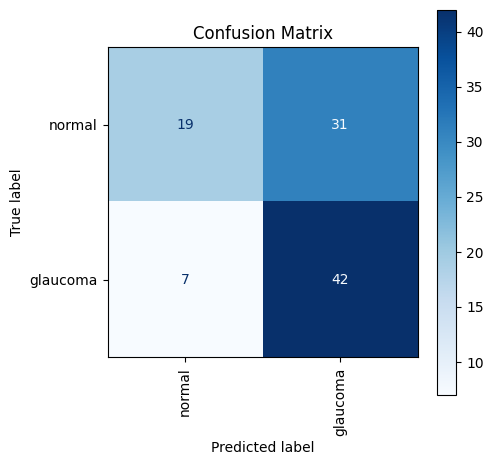

In [43]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the data
data_path = "04-Glaucoma.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and its columns to verify structure
data.head(), data.columns

# Extract the ground truth and prediction columns
ground_truth = data['1'].astype('str')
predictions = data['# of Shots 4'].astype('str')

# Print the unique values and their indices for ground_truth and predictions
print("Ground Truth:")
print(pd.unique(ground_truth))
print(ground_truth.index)

print("\nPredictions:")
print(pd.unique(predictions))
print(predictions.index)

# Generate the confusion matrix
cm = confusion_matrix(ground_truth, predictions, labels=pd.unique(data['1']))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pd.unique(data['1']))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
ax.set_title('Confusion Matrix')
plt.show()

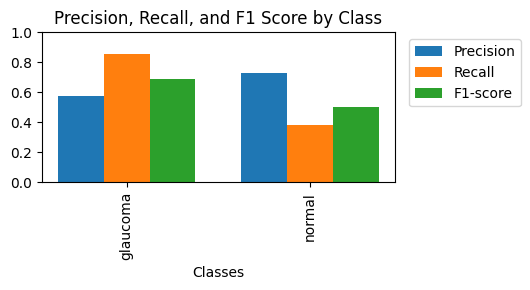

      Class  Precision    Recall  F1-score
0  glaucoma   0.575342  0.857143  0.688525
1    normal   0.730769  0.380000  0.500000


In [5]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "04-Glaucoma.csv"
data = pd.read_csv(data_path)

# Extract the ground truth and prediction columns
ground_truth = data['1'].astype(str)
predictions = data['# of Shots 4'].astype(str)

# Get the unique classes present in the ground truth
classes = np.unique(ground_truth)

# Create a dictionary to map ground truth classes to their indices
class_map = {cls: i for i, cls in enumerate(classes)}

# Map predictions to their corresponding class indices
mapped_predictions = [class_map.get(pred, -1) for pred in predictions]

# Get the indices where mapped_predictions is not equal to -1
valid_indices = np.where(np.array(mapped_predictions) != -1)[0]

# Remove predictions that are not in the class map
mapped_predictions = [mapped_predictions[i] for i in valid_indices]
ground_truth = ground_truth[valid_indices]

# Create a reverse dictionary to map indices back to class labels
reverse_class_map = {i: cls for i, cls in enumerate(classes)}

# Convert mapped_predictions back to class labels
mapped_predictions_labels = [reverse_class_map[pred] for pred in mapped_predictions]

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(ground_truth, mapped_predictions_labels, labels=classes, average=None)

# Plot setup
fig, ax = plt.subplots(figsize=(5, 3))
index = np.arange(len(classes))
bar_width = 0.25

# Bar plots
ax.bar(index, precision, bar_width, label='Precision')
ax.bar(index + bar_width, recall, bar_width, label='Recall')
ax.bar(index + 2*bar_width, f1, bar_width, label='F1-score')

# Labeling and aesthetics
ax.set_xlabel('Classes')
ax.set_title('Precision, Recall, and F1 Score by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes, rotation=90)
ax.set_ylim(0, 1)  # Adjust y-axis
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Adjust the right spacing to accommodate the legend
plt.show()

# Create a dataframe with the metrics
metrics_df = pd.DataFrame({'Class': classes, 'Precision': precision, 'Recall': recall, 'F1-score': f1})
print(metrics_df)

Note that previously the values for maximum number of shots (number of examples fed to complete the task) is provided. we can look at how the evolution happened with respect to the number of examples given:

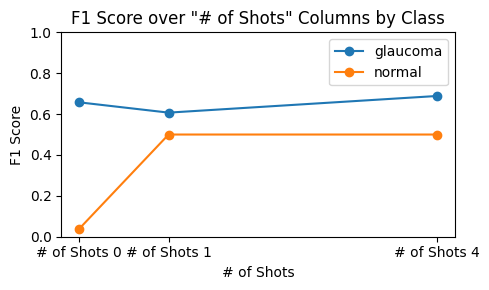

          # of Shots 0  # of Shots 1  # of Shots 4
glaucoma      0.657534      0.607143      0.688525
normal        0.038462      0.500000      0.500000


In [4]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "04-Glaucoma.csv"
data = pd.read_csv(data_path)

# Extract the ground truth column
ground_truth = data['1'].astype(str)

# Get the unique classes present in the ground truth
classes = np.unique(ground_truth)

# Create a dictionary to map ground truth classes to their indices
class_map = {cls: i for i, cls in enumerate(classes)}

# Initialize a list to store F1 scores for each "# of Shots" column
f1_scores = []

# Iterate over the "# of Shots" columns
for i in [0, 1, 4]:
    # Extract the prediction column
    predictions = data[f'# of Shots {i}'].astype(str)
    
    # Map predictions to their corresponding class indices
    mapped_predictions = [class_map.get(pred, -1) for pred in predictions]
    
    # Get the indices where mapped_predictions is not equal to -1
    valid_indices = np.where(np.array(mapped_predictions) != -1)[0]
    
    # Remove predictions that are not in the class map
    mapped_predictions = [mapped_predictions[i] for i in valid_indices]
    ground_truth_filtered = ground_truth[valid_indices]
    
    # Create a reverse dictionary to map indices back to class labels
    reverse_class_map = {i: cls for i, cls in enumerate(classes)}
    
    # Convert mapped_predictions back to class labels
    mapped_predictions_labels = [reverse_class_map[pred] for pred in mapped_predictions]
    
    # Calculate precision, recall, and F1-score
    _, _, f1, _ = precision_recall_fscore_support(ground_truth_filtered, mapped_predictions_labels, labels=classes, average=None)
    
    # Append the F1 scores to the list
    f1_scores.append(f1)

# Convert the list of F1 scores to a NumPy array
f1_scores = np.array(f1_scores)

# Plot setup
fig, ax = plt.subplots(figsize=(5, 3))

# Plot F1 scores for each class over different "# of Shots" columns
for i, cls in enumerate(classes):
    ax.plot([0, 1, 4], f1_scores[:, i], marker='o', label=cls)

# Labeling and aesthetics
ax.set_xlabel('# of Shots')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score over "# of Shots" Columns by Class')
ax.set_xticks([0, 1, 4])
ax.set_xticklabels([f'# of Shots {i}' for i in [0, 1, 4]])
ax.set_ylim(0.00, 1)  # Adjust y-axis
ax.legend()
plt.tight_layout()
plt.show()

# Now to get the printing
column_names = [f'# of Shots {i}' for i in [0, 1, 4]]

# Convert the F1 scores to a dictionary with class labels as keys
f1_scores_dict = {cls: scores for cls, scores in zip(classes, f1_scores.T)}

# Create the DataFrame
f1_scores_df = pd.DataFrame.from_dict(f1_scores_dict, orient='index', columns=column_names)

# Print the DataFrame
print(f1_scores_df)

# 05 CT

The Computed Tomography (CT) Brain Scan dataset contains CT images of the brain aimed at detecting and classifying various conditions such as cancer, tumors, and aneurysms. For this evaluation, a subset of 100 CT scan images was sampled from the dataset. GPT-4o was tasked with analyzing these images and classifying them into one of three categories: "cancer", "tumor", or "aneurysm". The model's predictions were compared against the ground truth labels to assess its performance in identifying these medical conditions from CT brain imagery.

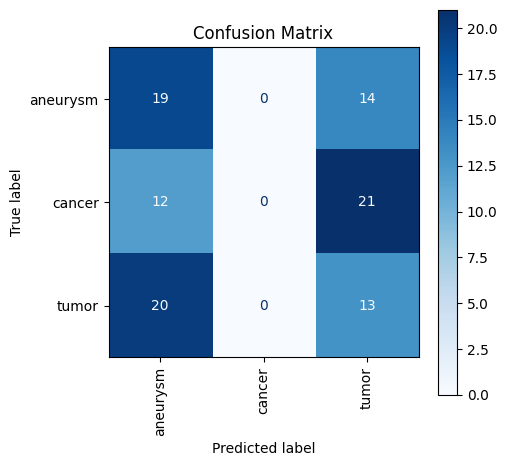

Confusion Matrix:
          aneurysm  cancer  tumor
aneurysm        19       0     14
cancer          12       0     21
tumor           20       0     13


In [57]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the data
data_path = "05-CT.csv"
data = pd.read_csv(data_path)


# Extract the ground truth and prediction columns
ground_truth = data['1'].astype('str')
predictions = data['# of Shots 0'].astype('str')

# Generate the confusion matrix
cm = confusion_matrix(ground_truth, predictions, labels=pd.unique(data['1']))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pd.unique(data['1']))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
ax.set_title('Confusion Matrix')
plt.show()

# Convert the confusion matrix to a dataframe
cm_df = pd.DataFrame(cm, index=pd.unique(data['1']), columns=pd.unique(data['1']))

# Print the confusion matrix dataframe
print("Confusion Matrix:")
print(cm_df)

The confusion matrix reveals that the model completely failed to predict the 'cancer' class, potentially due to lack of representative training data or inherent similarities with other classes. Additionally, it struggled to distinguish between 'aneurysm' and 'tumor' classes, with significant misclassifications in both directions, suggesting a need for further fine-tuning or incorporation of additional relevant features.

# 06 captions: 

The Flickr8k-Images-Captions dataset is a compact collection designed for image captioning tasks. It consists of 8,000 images sourced from Flickr, each accompanied by multiple human-annotated captions describing the visual content. For this evaluation, a subset of 100 images from the dataset was used. GPT-4o was tasked with inferring the context and generating natural language descriptions for these 100 images. The model's generated captions were compared against the ground truth human captions using the BLEU score, a metric that measures the similarity between machine and human-generated texts. This dataset provided a testbed for assessing GPT-4o's ability to comprehend visual scenes and translate them into accurate and coherent textual descriptions.

In [67]:
import csv
from nltk.translate.bleu_score import corpus_bleu

# Read the CSV file
data = []
with open('06-Captions.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        data.append(row)

# Extract the ground truth and predicted captions
ground_truth = [row[2] for row in data]
predicted = [row[3] for row in data]


# Calculate BLEU scores
bleu_1 = corpus_bleu([[gt.split()] for gt in ground_truth], [pred.split() for pred in predicted], weights=(1, 0, 0, 0))
bleu_2 = corpus_bleu([[gt.split()] for gt in ground_truth], [pred.split() for pred in predicted], weights=(0.5, 0.5, 0, 0))
bleu_3 = corpus_bleu([[gt.split()] for gt in ground_truth], [pred.split() for pred in predicted], weights=(0.33, 0.33, 0.33, 0))
bleu_4 = corpus_bleu([[gt.split()] for gt in ground_truth], [pred.split() for pred in predicted], weights=(0.25, 0.25, 0.25, 0.25))


print(f"BLEU-1: {bleu_1:.3f}")
print(f"BLEU-2: {bleu_2:.3f}")
print(f"BLEU-3: {bleu_3:.3f}")
print(f"BLEU-4: {bleu_4:.3f}")

BLEU-1: 0.193
BLEU-2: 0.095
BLEU-3: 0.058
BLEU-4: 0.031


# 07 VQA

The Visual Question Answering (VQA) dataset is a multimodal benchmark that combines computer vision and natural language processing tasks. It consists of images paired with natural language questions related to the visual content. The goal is to produce accurate natural language answers by comprehending the semantics of both the image and the question. For this evaluation, a subset of 100 image-question pairs was sampled from the dataset. GPT-4o was tasked with analyzing the provided image and the corresponding question, and generating an appropriate answer chosen from a predefined list of possible answers. The model's generated answers were compared against the ground truth answers to assess its performance in this AI-complete task, which involves a wide range of sub-problems such as object detection, scene classification, and multimodal reasoning.

In [73]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "07-VQA-all.csv"
data = pd.read_csv(data_path)

# Extract the ground truth and prediction columns
ground_truth = data['answer'].astype(str)
predictions = data['# of Shots 8'].astype(str)

#calculate overall accuracy
accuracy = (ground_truth == predictions).mean()
print(f"Overall accuracy: {accuracy:.3f}")



Overall accuracy: 0.360


### Now checking how the accuracy evolved after giving it few examples

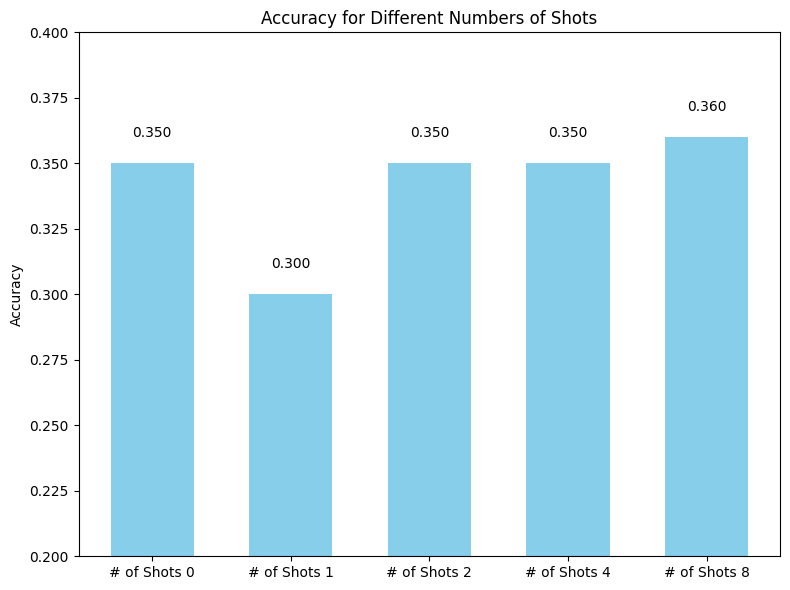

           Shot  Accuracy
0  # of Shots 0      0.35
1  # of Shots 1      0.30
2  # of Shots 2      0.35
3  # of Shots 4      0.35
4  # of Shots 8      0.36


In [54]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "07-VQA-all.csv"
data = pd.read_csv(data_path)

# Define the shot columns
shot_columns = ['# of Shots 0', '# of Shots 1', '# of Shots 2', '# of Shots 4', '# of Shots 8']

# Extract the ground truth column
ground_truth = data['answer'].astype(str)

# Calculate accuracy for each shot
accuracies = []
for shot_column in shot_columns:
    predictions = data[shot_column].astype(str)
    accuracy = (ground_truth == predictions).mean()
    accuracies.append(accuracy)

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(shot_columns))
width = 0.6
ax.bar(x, accuracies, width, color='skyblue')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Different Numbers of Shots')
ax.set_xticks(x)
ax.set_xticklabels(shot_columns)
ax.set_ylim(0.2, 0.4)

# Add accuracy values on top of each bar
for i, accuracy in enumerate(accuracies):
    ax.text(i, accuracy + 0.01, f"{accuracy:.3f}", ha='center', fontsize=10)

fig.tight_layout()
plt.show()

# Create a dataframe with the accuracies
accuracy_df = pd.DataFrame({'Shot': shot_columns, 'Accuracy': accuracies})
print(accuracy_df)

So, giving few examples in a task with a lot of options does not prove very useful. On contrary, it decreases the performance if there's just one example because the distribution of answers might become skewed by this unrelated task , in case of VQA (since there are a lot of possibilities for the nature of a task)

# 8. Soybeabs

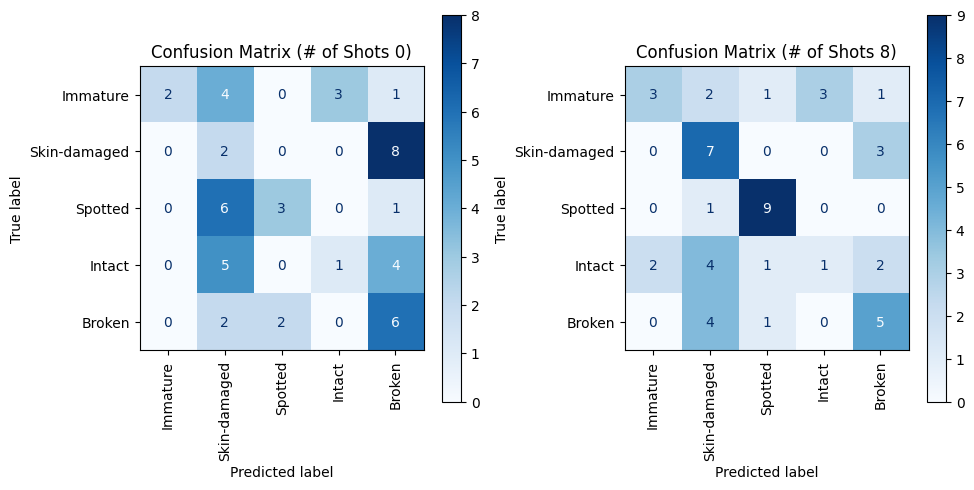

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the data
data_path = "results/GPT-4o/Soybean Seeds.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and its columns to verify structure
data.head(), data.columns

# Extract the ground truth and prediction columns
ground_truth = data['1'].astype('str')
predictions_0 = data['# of Shots 0'].astype('str')
predictions_1 = data['# of Shots 8'].astype('str')

# Generate the confusion matrices
cm_0 = confusion_matrix(ground_truth, predictions_0, labels=pd.unique(data['1']))
cm_1 = confusion_matrix(ground_truth, predictions_1, labels=pd.unique(data['1']))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first confusion matrix
disp_0 = ConfusionMatrixDisplay(confusion_matrix=cm_0, display_labels=pd.unique(data['1']))
disp_0.plot(cmap=plt.cm.Blues, ax=axs[0], xticks_rotation='vertical')
axs[0].set_title('Confusion Matrix (# of Shots 0)')

# Plot the second confusion matrix
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=pd.unique(data['1']))
disp_1.plot(cmap=plt.cm.Blues, ax=axs[1], xticks_rotation='vertical')
axs[1].set_title('Confusion Matrix (# of Shots 8)')

plt.tight_layout()
plt.savefig("analysis/soybean/0.png")
plt.show()

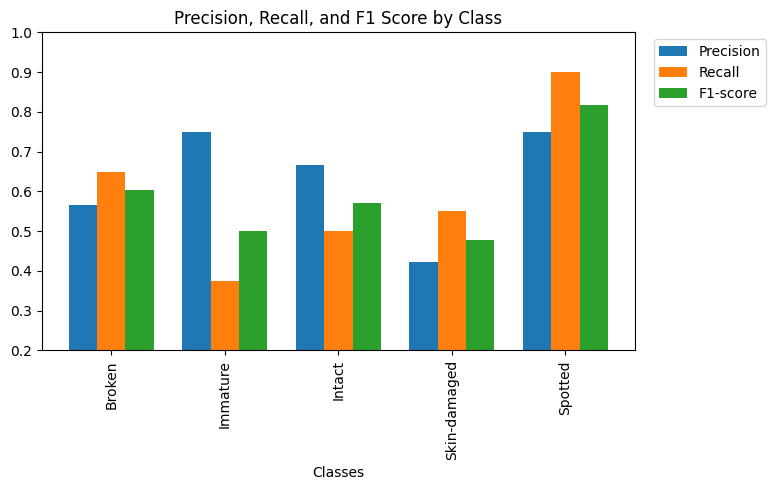

          Class  Precision  Recall  F1-score
0        Broken   0.565217   0.650  0.604651
1      Immature   0.750000   0.375  0.500000
2        Intact   0.666667   0.500  0.571429
3  Skin-damaged   0.423077   0.550  0.478261
4       Spotted   0.750000   0.900  0.818182


In [11]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "Soybean Seeds.csv"
data = pd.read_csv(data_path)

# Extract the ground truth and prediction columns
ground_truth = data['1'].astype(str)
predictions = data['# of Shots 8'].astype(str)

# Get the unique classes present in the ground truth
classes = np.unique(ground_truth)

# Create a dictionary to map ground truth classes to their indices
class_map = {cls: i for i, cls in enumerate(classes)}

# Map predictions to their corresponding class indices
mapped_predictions = [class_map.get(pred, -1) for pred in predictions]

# Get the indices where mapped_predictions is not equal to -1
valid_indices = np.where(np.array(mapped_predictions) != -1)[0]

# Remove predictions that are not in the class map
mapped_predictions = [mapped_predictions[i] for i in valid_indices]
ground_truth = ground_truth[valid_indices]

# Create a reverse dictionary to map indices back to class labels
reverse_class_map = {i: cls for i, cls in enumerate(classes)}

# Convert mapped_predictions back to class labels
mapped_predictions_labels = [reverse_class_map[pred] for pred in mapped_predictions]

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(ground_truth, mapped_predictions_labels, labels=classes, average=None)

# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(len(classes))
bar_width = 0.25

# Bar plots
ax.bar(index, precision, bar_width, label='Precision')
ax.bar(index + bar_width, recall, bar_width, label='Recall')
ax.bar(index + 2*bar_width, f1, bar_width, label='F1-score')

# Labeling and aesthetics
ax.set_xlabel('Classes')
ax.set_title('Precision, Recall, and F1 Score by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes, rotation=90)
ax.set_ylim(0.2, 1)  # Adjust y-axis
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Adjust the right spacing to accommodate the legend
plt.savefig("analysis/soybean/1.png")
plt.show()

# Create a dataframe with the metrics
metrics_df = pd.DataFrame({'Class': classes, 'Precision': precision, 'Recall': recall, 'F1-score': f1})
print(metrics_df)

/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


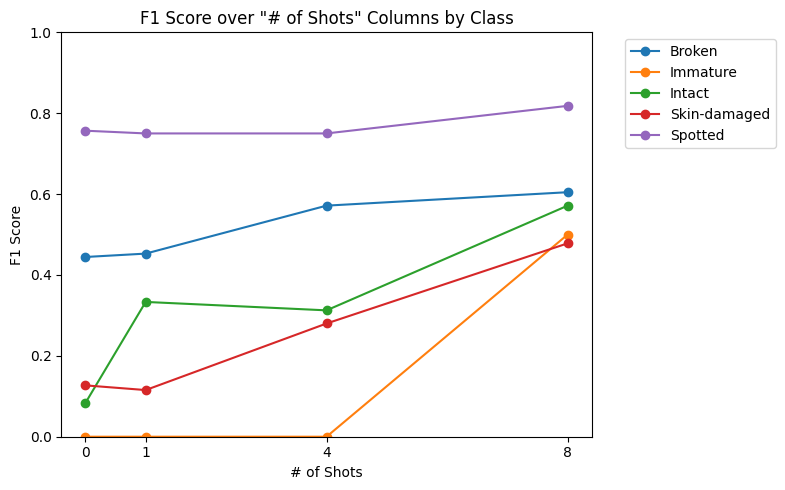

              # of Shots 0  # of Shots 1  # of Shots 4  # of Shots 8
Broken            0.444444      0.452830      0.571429      0.604651
Immature          0.000000      0.000000      0.000000      0.500000
Intact            0.083333      0.333333      0.312500      0.571429
Skin-damaged      0.126984      0.115385      0.280000      0.478261
Spotted           0.756757      0.750000      0.750000      0.818182


In [12]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "Soybean Seeds.csv"
data = pd.read_csv(data_path)

# Extract the ground truth column
ground_truth = data['1'].astype(str)

# Get the unique classes present in the ground truth
classes = np.unique(ground_truth)

# Create a dictionary to map ground truth classes to their indices
class_map = {cls: i for i, cls in enumerate(classes)}

# Initialize a list to store F1 scores for each "# of Shots" column
f1_scores = []

# Iterate over the "# of Shots" columns
for i in [0, 1, 4, 8]:
    # Extract the prediction column
    predictions = data[f'# of Shots {i}'].astype(str)
    
    # Map predictions to their corresponding class indices
    mapped_predictions = [class_map.get(pred, -1) for pred in predictions]
    
    # Get the indices where mapped_predictions is not equal to -1
    valid_indices = np.where(np.array(mapped_predictions) != -1)[0]
    
    # Remove predictions that are not in the class map
    mapped_predictions = [mapped_predictions[i] for i in valid_indices]
    ground_truth_filtered = ground_truth[valid_indices]
    
    # Create a reverse dictionary to map indices back to class labels
    reverse_class_map = {i: cls for i, cls in enumerate(classes)}
    
    # Convert mapped_predictions back to class labels
    mapped_predictions_labels = [reverse_class_map[pred] for pred in mapped_predictions]
    
    # Calculate precision, recall, and F1-score
    _, _, f1, _ = precision_recall_fscore_support(ground_truth_filtered, mapped_predictions_labels, labels=classes, average=None)
    
    # Append the F1 scores to the list
    f1_scores.append(f1)

# Convert the list of F1 scores to a NumPy array
f1_scores = np.array(f1_scores)

# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))

# Plot F1 scores for each class over different "# of Shots" columns
for i, cls in enumerate(classes):
    ax.plot([0, 1, 4, 8], f1_scores[:, i], marker='o', label=cls)

# Labeling and aesthetics
ax.set_xlabel('# of Shots')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score over "# of Shots" Columns by Class')
ax.set_xticks([0, 1, 4, 8])
ax.set_xticklabels([f'{i}' for i in [0, 1, 4, 8]])
ax.set_ylim(0.00, 1)  # Adjust y-axis
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("analysis/easy.png")
plt.savefig("analysis/soybean/2.png")
plt.show()

# Now to get the printing
column_names = [f'# of Shots {i}' for i in [0, 1, 4, 8]]

# Convert the F1 scores to a dictionary with class labels as keys
f1_scores_dict = {cls: scores for cls, scores in zip(classes, f1_scores.T)}

# Create the DataFrame
f1_scores_df = pd.DataFrame.from_dict(f1_scores_dict, orient='index', columns=column_names)

# Print the DataFrame
print(f1_scores_df)

# 9. Mango🥭 Leaf🍃🍂 Disease Dataset

Name: MangoLeafBD Dataset

Year of Availability: 2022

Short Description: The MangoLeafBD dataset contains 4000 images of mango leaves, including healthy leaves and those affected by seven different diseases. Importance: This dataset is crucial for developing automated disease detection systems in mango cultivation, focusing on the classification of various leaf diseases. We specifically use the subset containing video frame pictures of durum wheat kernels for our analysis.

Classes/expected output labels of dataset: 
1. Healthy
2. Anthracnose
3. Bacterial Canker
4. Cutting Weevil
5. Die Back
6. Gall Midge
7. Powdery Mildew
8. Sooty Mould

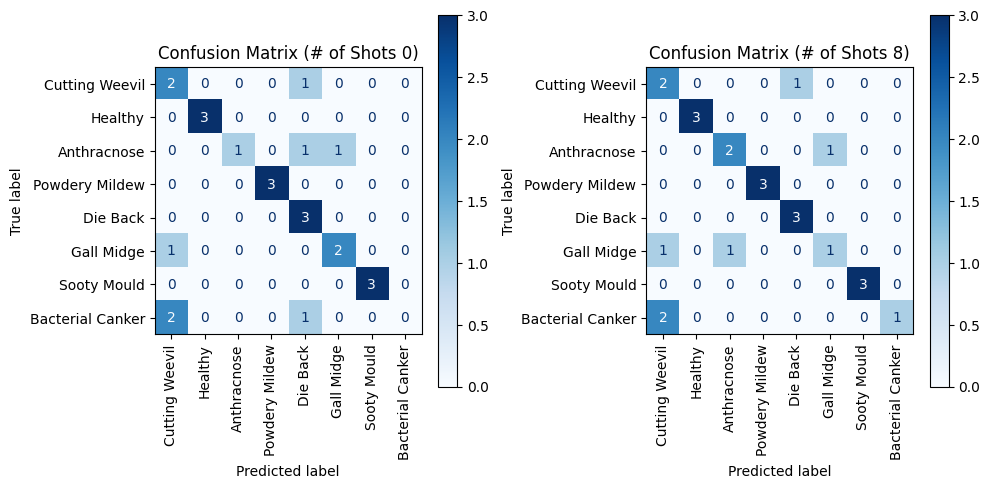

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the data
data_path = "/Users/muhammadarbabarshad/Documents/Personal Data/GPT4o-with-sakib/results/GPT-4o/Mango Leaf Disease.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and its columns to verify structure
data.head(), data.columns

# Extract the ground truth and prediction columns
ground_truth = data['1'].astype('str')
predictions_0 = data['# of Shots 0'].astype('str')
predictions_1 = data['# of Shots 8'].astype('str')

# Generate the confusion matrices
cm_0 = confusion_matrix(ground_truth, predictions_0, labels=pd.unique(data['1']))
cm_1 = confusion_matrix(ground_truth, predictions_1, labels=pd.unique(data['1']))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first confusion matrix
disp_0 = ConfusionMatrixDisplay(confusion_matrix=cm_0, display_labels=pd.unique(data['1']))
disp_0.plot(cmap=plt.cm.Blues, ax=axs[0], xticks_rotation='vertical')
axs[0].set_title('Confusion Matrix (# of Shots 0)')

# Plot the second confusion matrix
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=pd.unique(data['1']))
disp_1.plot(cmap=plt.cm.Blues, ax=axs[1], xticks_rotation='vertical')
axs[1].set_title('Confusion Matrix (# of Shots 8)')

plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "/Users/muhammadarbabarshad/Documents/Personal Data/GPT4o-with-sakib/results/Mango Leaf Disease/LLaVA v1.6 34B.csv"
data = pd.read_csv(data_path)

# Extract the ground truth and prediction columns
ground_truth = data['1'].astype(str)
predictions = data['# of Shots 8'].astype(str)

# Get the unique classes present in the ground truth
classes = np.unique(ground_truth)

# Create a dictionary to map ground truth classes to their indices
class_map = {cls: i for i, cls in enumerate(classes)}

# Map predictions to their corresponding class indices
mapped_predictions = [class_map.get(pred, -1) for pred in predictions]

# Get the indices where mapped_predictions is not equal to -1
valid_indices = np.where(np.array(mapped_predictions) != -1)[0]

# Remove predictions that are not in the class map
mapped_predictions = [mapped_predictions[i] for i in valid_indices]
ground_truth = ground_truth[valid_indices]

# Create a reverse dictionary to map indices back to class labels
reverse_class_map = {i: cls for i, cls in enumerate(classes)}

# Convert mapped_predictions back to class labels
mapped_predictions_labels = [reverse_class_map[pred] for pred in mapped_predictions]

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(ground_truth, mapped_predictions_labels, labels=classes, average=None)

# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(len(classes))
bar_width = 0.25

# Bar plots
ax.bar(index, precision, bar_width, label='Precision')
ax.bar(index + bar_width, recall, bar_width, label='Recall')
ax.bar(index + 2*bar_width, f1, bar_width, label='F1-score')

# Labeling and aesthetics
ax.set_xlabel('Classes')
ax.set_title('Precision, Recall, and F1 Score by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes, rotation=90)
ax.set_ylim(0.2, 1)  # Adjust y-axis
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Adjust the right spacing to accommodate the legend
plt.show()

# Create a dataframe with the metrics
metrics_df = pd.DataFrame({'Class': classes, 'Precision': precision, 'Recall': recall, 'F1-score': f1})
print(metrics_df)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/muhammadarbabarshad/Documents/Personal Data/GPT4o-with-sakib/results/Mango Leaf Disease/LLaVA v1.6 34B.csv'

/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


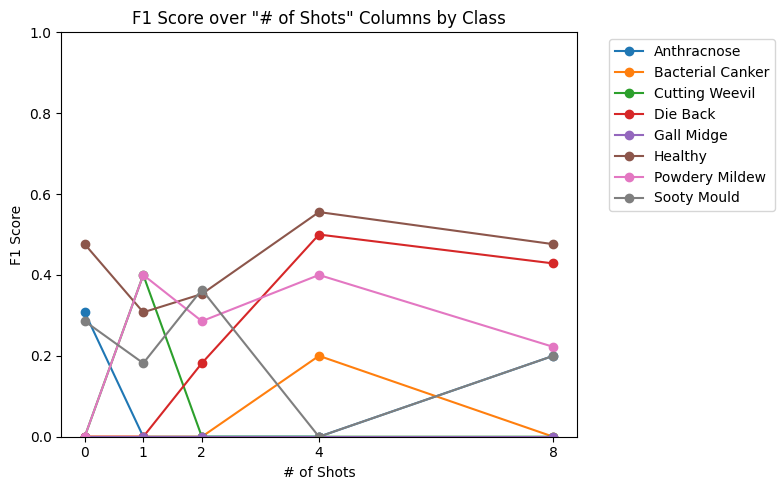

                  # of Shots 0  # of Shots 1  # of Shots 2  # of Shots 4  \
Anthracnose           0.307692      0.000000      0.000000      0.000000   
Bacterial Canker      0.000000      0.000000      0.000000      0.200000   
Cutting Weevil        0.000000      0.400000      0.000000      0.000000   
Die Back              0.000000      0.000000      0.181818      0.500000   
Gall Midge            0.000000      0.000000      0.000000      0.000000   
Healthy               0.476190      0.307692      0.352941      0.555556   
Powdery Mildew        0.000000      0.400000      0.285714      0.400000   
Sooty Mould           0.285714      0.181818      0.363636      0.000000   

                  # of Shots 8  
Anthracnose           0.200000  
Bacterial Canker      0.000000  
Cutting Weevil        0.000000  
Die Back              0.428571  
Gall Midge            0.000000  
Healthy               0.476190  
Powdery Mildew        0.222222  
Sooty Mould           0.200000  


In [4]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "/Users/muhammadarbabarshad/Documents/Personal Data/GPT4o-with-sakib/results/Mango Leaf Disease/LLaVA v1.6 34B.csv"
data = pd.read_csv(data_path)

# Extract the ground truth column
ground_truth = data['1'].astype(str)

# Get the unique classes present in the ground truth
classes = np.unique(ground_truth)

# Create a dictionary to map ground truth classes to their indices
class_map = {cls: i for i, cls in enumerate(classes)}

# Initialize a list to store F1 scores for each "# of Shots" column
f1_scores = []

# Iterate over the "# of Shots" columns
for i in [0, 1, 2, 4, 8]:
    # Extract the prediction column
    predictions = data[f'# of Shots {i}'].astype(str)
    
    # Map predictions to their corresponding class indices
    mapped_predictions = [class_map.get(pred, -1) for pred in predictions]
    
    # Get the indices where mapped_predictions is not equal to -1
    valid_indices = np.where(np.array(mapped_predictions) != -1)[0]
    
    # Remove predictions that are not in the class map
    mapped_predictions = [mapped_predictions[i] for i in valid_indices]
    ground_truth_filtered = ground_truth[valid_indices]
    
    # Create a reverse dictionary to map indices back to class labels
    reverse_class_map = {i: cls for i, cls in enumerate(classes)}
    
    # Convert mapped_predictions back to class labels
    mapped_predictions_labels = [reverse_class_map[pred] for pred in mapped_predictions]
    
    # Calculate precision, recall, and F1-score
    _, _, f1, _ = precision_recall_fscore_support(ground_truth_filtered, mapped_predictions_labels, labels=classes, average=None)
    
    # Append the F1 scores to the list
    f1_scores.append(f1)

# Convert the list of F1 scores to a NumPy array
f1_scores = np.array(f1_scores)

# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))

# Plot F1 scores for each class over different "# of Shots" columns
for i, cls in enumerate(classes):
    ax.plot([0, 1, 2, 4, 8], f1_scores[:, i], marker='o', label=cls)

# Labeling and aesthetics
ax.set_xlabel('# of Shots')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score over "# of Shots" Columns by Class')
ax.set_xticks([0, 1, 2, 4, 8])
ax.set_xticklabels([f'{i}' for i in [0, 1, 2, 4, 8]])
ax.set_ylim(0.00, 1)  # Adjust y-axis
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("analysis/challenging_I.png")
plt.show()

# Now to get the printing
column_names = [f'# of Shots {i}' for i in [0, 1, 2, 4, 8]]

# Convert the F1 scores to a dictionary with class labels as keys
f1_scores_dict = {cls: scores for cls, scores in zip(classes, f1_scores.T)}

# Create the DataFrame
f1_scores_df = pd.DataFrame.from_dict(f1_scores_dict, orient='index', columns=column_names)


# Print the DataFrame
print(f1_scores_df)


# 10. Durum Wheat Dataset

Name: Durum Wheat Dataset
Year of Availability: 2019

Short Description: This dataset focuses on durum wheat kernels, specifically their vitreousness, which is crucial for producing quality food products. Importance: The dataset is significant for developing real-time sorting systems in agriculture, particularly for identifying vitreous durum wheat kernels using artificial neural networks (ANNs). We specifically use the second dataset, which contains video frame pictures of durum wheat kernels.

Classes/expected output labels of dataset:

Vitreous Durum Wheat Kernels

Starchy Durum Wheat Kernels

Foreign Matters (impurities)

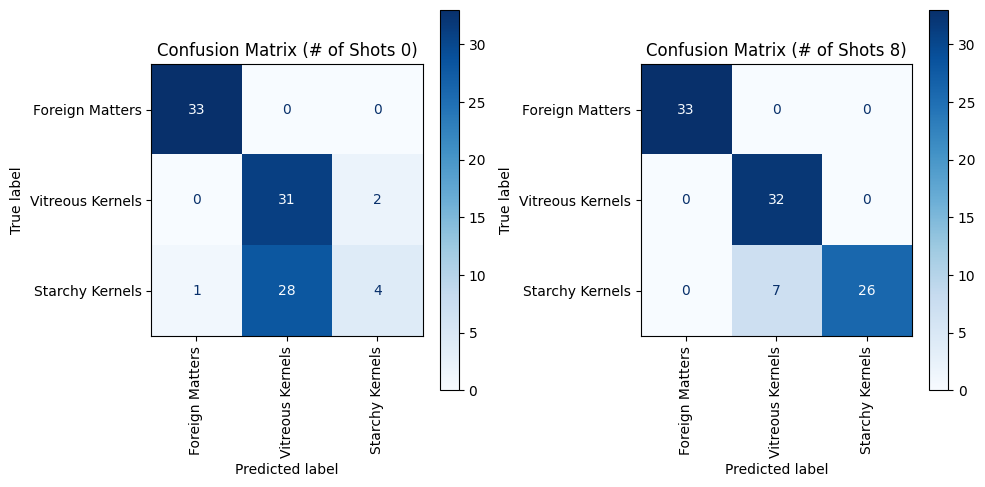

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the data
data_path = "10-Durum.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and its columns to verify structure
data.head(), data.columns

# Extract the ground truth and prediction columns
ground_truth = data['1'].astype('str')
predictions_0 = data['# of Shots 0'].astype('str')
predictions_1 = data['# of Shots 8'].astype('str')

# Generate the confusion matrices
cm_0 = confusion_matrix(ground_truth, predictions_0, labels=pd.unique(data['1']))
cm_1 = confusion_matrix(ground_truth, predictions_1, labels=pd.unique(data['1']))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first confusion matrix
disp_0 = ConfusionMatrixDisplay(confusion_matrix=cm_0, display_labels=pd.unique(data['1']))
disp_0.plot(cmap=plt.cm.Blues, ax=axs[0], xticks_rotation='vertical')
axs[0].set_title('Confusion Matrix (# of Shots 0)')

# Plot the second confusion matrix
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=pd.unique(data['1']))
disp_1.plot(cmap=plt.cm.Blues, ax=axs[1], xticks_rotation='vertical')
axs[1].set_title('Confusion Matrix (# of Shots 8)')

plt.tight_layout()
plt.show()

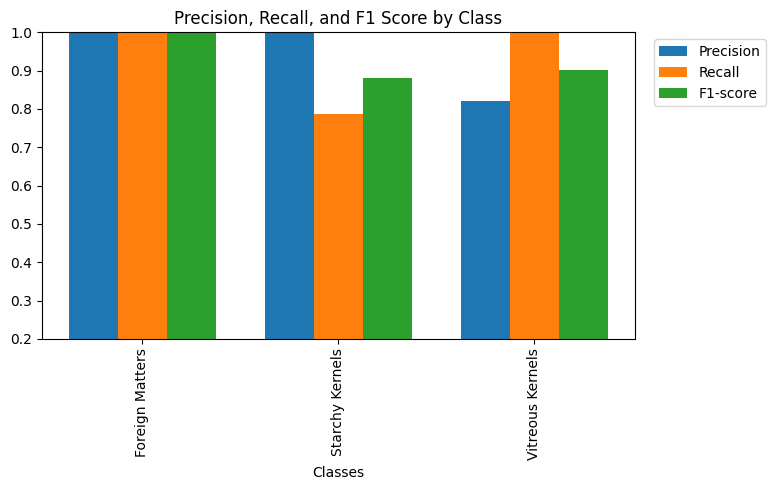

              Class  Precision    Recall  F1-score
0   Foreign Matters   1.000000  1.000000  1.000000
1   Starchy Kernels   1.000000  0.787879  0.881356
2  Vitreous Kernels   0.820513  1.000000  0.901408


In [9]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "10-Durum.csv"
data = pd.read_csv(data_path)

# Extract the ground truth and prediction columns
ground_truth = data['1'].astype(str)
predictions = data['# of Shots 8'].astype(str)

# Get the unique classes present in the ground truth
classes = np.unique(ground_truth)

# Create a dictionary to map ground truth classes to their indices
class_map = {cls: i for i, cls in enumerate(classes)}

# Map predictions to their corresponding class indices
mapped_predictions = [class_map.get(pred, -1) for pred in predictions]

# Get the indices where mapped_predictions is not equal to -1
valid_indices = np.where(np.array(mapped_predictions) != -1)[0]

# Remove predictions that are not in the class map
mapped_predictions = [mapped_predictions[i] for i in valid_indices]
ground_truth = ground_truth[valid_indices]

# Create a reverse dictionary to map indices back to class labels
reverse_class_map = {i: cls for i, cls in enumerate(classes)}

# Convert mapped_predictions back to class labels
mapped_predictions_labels = [reverse_class_map[pred] for pred in mapped_predictions]

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(ground_truth, mapped_predictions_labels, labels=classes, average=None)

# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(len(classes))
bar_width = 0.25

# Bar plots
ax.bar(index, precision, bar_width, label='Precision')
ax.bar(index + bar_width, recall, bar_width, label='Recall')
ax.bar(index + 2*bar_width, f1, bar_width, label='F1-score')

# Labeling and aesthetics
ax.set_xlabel('Classes')
ax.set_title('Precision, Recall, and F1 Score by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes, rotation=90)
ax.set_ylim(0.2, 1)  # Adjust y-axis
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Adjust the right spacing to accommodate the legend
plt.show()

# Create a dataframe with the metrics
metrics_df = pd.DataFrame({'Class': classes, 'Precision': precision, 'Recall': recall, 'F1-score': f1})
print(metrics_df)

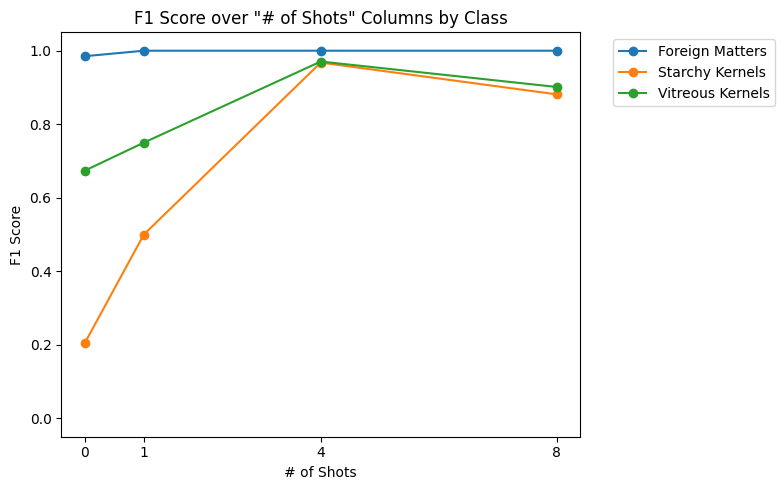

                  # of Shots 0  # of Shots 1  # of Shots 4  # of Shots 8
Foreign Matters       0.985075          1.00      1.000000      1.000000
Starchy Kernels       0.205128          0.50      0.967742      0.881356
Vitreous Kernels      0.673913          0.75      0.970588      0.901408


In [10]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "10-Durum.csv"
data = pd.read_csv(data_path)

# Extract the ground truth column
ground_truth = data['1'].astype(str)

# Get the unique classes present in the ground truth
classes = np.unique(ground_truth)

# Create a dictionary to map ground truth classes to their indices
class_map = {cls: i for i, cls in enumerate(classes)}

# Initialize a list to store F1 scores for each "# of Shots" column
f1_scores = []

# Iterate over the "# of Shots" columns
for i in [0, 1, 4, 8]:
    # Extract the prediction column
    predictions = data[f'# of Shots {i}'].astype(str)
    
    # Map predictions to their corresponding class indices
    mapped_predictions = [class_map.get(pred, -1) for pred in predictions]
    
    # Get the indices where mapped_predictions is not equal to -1
    valid_indices = np.where(np.array(mapped_predictions) != -1)[0]
    
    # Remove predictions that are not in the class map
    mapped_predictions = [mapped_predictions[i] for i in valid_indices]
    ground_truth_filtered = ground_truth[valid_indices]
    
    # Create a reverse dictionary to map indices back to class labels
    reverse_class_map = {i: cls for i, cls in enumerate(classes)}
    
    # Convert mapped_predictions back to class labels
    mapped_predictions_labels = [reverse_class_map[pred] for pred in mapped_predictions]
    
    # Calculate precision, recall, and F1-score
    _, _, f1, _ = precision_recall_fscore_support(ground_truth_filtered, mapped_predictions_labels, labels=classes, average=None)
    
    # Append the F1 scores to the list
    f1_scores.append(f1)

# Convert the list of F1 scores to a NumPy array
f1_scores = np.array(f1_scores)

# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))

# Plot F1 scores for each class over different "# of Shots" columns
for i, cls in enumerate(classes):
    ax.plot([0, 1, 4, 8], f1_scores[:, i], marker='o', label=cls)

# Labeling and aesthetics
ax.set_xlabel('# of Shots')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score over "# of Shots" Columns by Class')
ax.set_xticks([0, 1, 4, 8])
ax.set_xticklabels([f'{i}' for i in [0, 1, 4, 8]])
ax.set_ylim(-0.05, 1.05)  # Adjust y-axis
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Now to get the printing
column_names = [f'# of Shots {i}' for i in [0, 1, 4, 8]]

# Convert the F1 scores to a dictionary with class labels as keys
f1_scores_dict = {cls: scores for cls, scores in zip(classes, f1_scores.T)}

# Create the DataFrame
f1_scores_df = pd.DataFrame.from_dict(f1_scores_dict, orient='index', columns=column_names)

# Print the DataFrame
print(f1_scores_df)

# 11. Bean Leaf

Name: Bean Leaf Lesions Classification Dataset

Year of Availability: Not specified in the given information

Short Description: This dataset comprises images of bean leaf lesions in three states. Importance: It is crucial for plant pathology research and automated disease detection in agriculture. We use 100 class-balanced images from this dataset, focusing on the classification of leaf health conditions in beans.

Classes/expected output labels of dataset: 
1. Healthy
2. Angular leaf spot
3. Bean rust

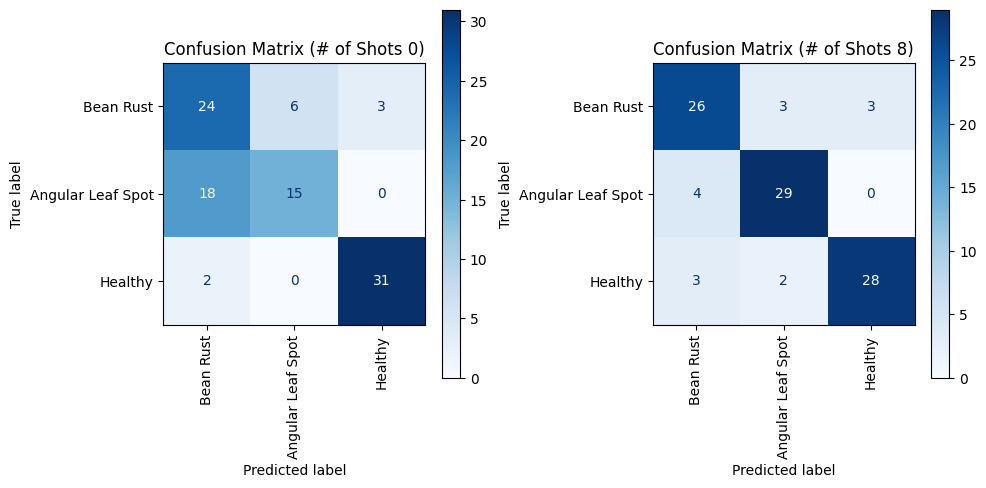

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the data
data_path = "11-Bean-Leaf.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and its columns to verify structure
data.head(), data.columns

# Extract the ground truth and prediction columns
ground_truth = data['1'].astype('str')
predictions_0 = data['# of Shots 0'].astype('str')
predictions_1 = data['# of Shots 8'].astype('str')

# Generate the confusion matrices
cm_0 = confusion_matrix(ground_truth, predictions_0, labels=pd.unique(data['1']))
cm_1 = confusion_matrix(ground_truth, predictions_1, labels=pd.unique(data['1']))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first confusion matrix
disp_0 = ConfusionMatrixDisplay(confusion_matrix=cm_0, display_labels=pd.unique(data['1']))
disp_0.plot(cmap=plt.cm.Blues, ax=axs[0], xticks_rotation='vertical')
axs[0].set_title('Confusion Matrix (# of Shots 0)')

# Plot the second confusion matrix
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=pd.unique(data['1']))
disp_1.plot(cmap=plt.cm.Blues, ax=axs[1], xticks_rotation='vertical')
axs[1].set_title('Confusion Matrix (# of Shots 8)')

plt.tight_layout()
plt.show()

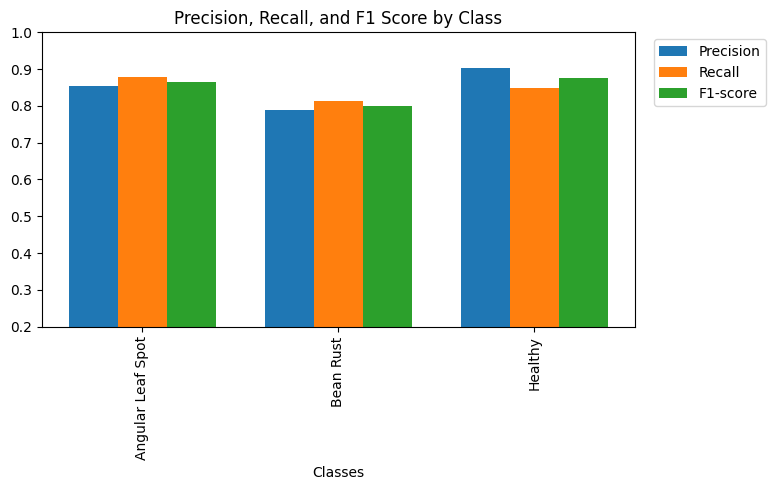

               Class  Precision    Recall  F1-score
0  Angular Leaf Spot   0.852941  0.878788  0.865672
1          Bean Rust   0.787879  0.812500  0.800000
2            Healthy   0.903226  0.848485  0.875000


In [20]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "11-Bean-Leaf.csv"
data = pd.read_csv(data_path)

# Extract the ground truth and prediction columns
ground_truth = data['1'].astype(str)
predictions = data['# of Shots 8'].astype(str)

# Get the unique classes present in the ground truth
classes = np.unique(ground_truth)

# Create a dictionary to map ground truth classes to their indices
class_map = {cls: i for i, cls in enumerate(classes)}

# Map predictions to their corresponding class indices
mapped_predictions = [class_map.get(pred, -1) for pred in predictions]

# Get the indices where mapped_predictions is not equal to -1
valid_indices = np.where(np.array(mapped_predictions) != -1)[0]

# Remove predictions that are not in the class map
mapped_predictions = [mapped_predictions[i] for i in valid_indices]
ground_truth = ground_truth[valid_indices]

# Create a reverse dictionary to map indices back to class labels
reverse_class_map = {i: cls for i, cls in enumerate(classes)}

# Convert mapped_predictions back to class labels
mapped_predictions_labels = [reverse_class_map[pred] for pred in mapped_predictions]

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(ground_truth, mapped_predictions_labels, labels=classes, average=None)

# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(len(classes))
bar_width = 0.25

# Bar plots
ax.bar(index, precision, bar_width, label='Precision')
ax.bar(index + bar_width, recall, bar_width, label='Recall')
ax.bar(index + 2*bar_width, f1, bar_width, label='F1-score')

# Labeling and aesthetics
ax.set_xlabel('Classes')
ax.set_title('Precision, Recall, and F1 Score by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes, rotation=90)
ax.set_ylim(0.2, 1)  # Adjust y-axis
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Adjust the right spacing to accommodate the legend
plt.show()

# Create a dataframe with the metrics
metrics_df = pd.DataFrame({'Class': classes, 'Precision': precision, 'Recall': recall, 'F1-score': f1})
print(metrics_df)

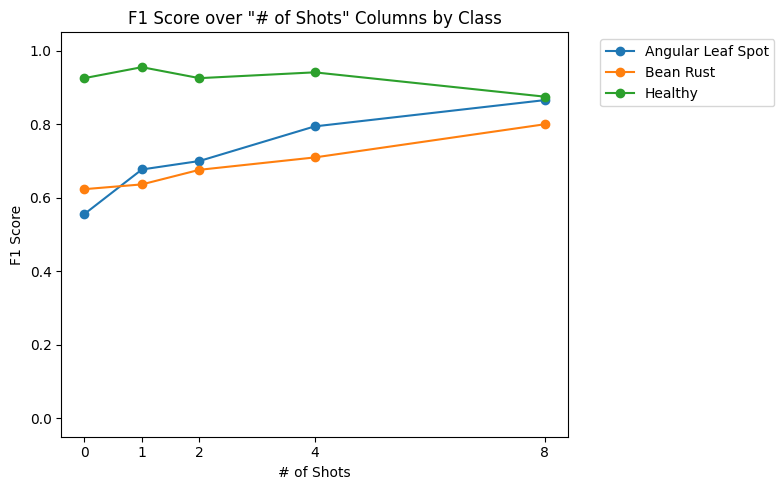

                   # of Shots 0  # of Shots 1  # of Shots 2  # of Shots 4  \
Angular Leaf Spot      0.555556      0.676923      0.700000      0.794118   
Bean Rust              0.623377      0.636364      0.676056      0.709677   
Healthy                0.925373      0.955224      0.925373      0.941176   

                   # of Shots 8  
Angular Leaf Spot      0.865672  
Bean Rust              0.800000  
Healthy                0.875000  


In [21]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "11-Bean-Leaf.csv"
data = pd.read_csv(data_path)

# Extract the ground truth column
ground_truth = data['1'].astype(str)

# Get the unique classes present in the ground truth
classes = np.unique(ground_truth)

# Create a dictionary to map ground truth classes to their indices
class_map = {cls: i for i, cls in enumerate(classes)}

# Initialize a list to store F1 scores for each "# of Shots" column
f1_scores = []

# Iterate over the "# of Shots" columns
for i in [0, 1, 2, 4, 8]:
    # Extract the prediction column
    predictions = data[f'# of Shots {i}'].astype(str)
    
    # Map predictions to their corresponding class indices
    mapped_predictions = [class_map.get(pred, -1) for pred in predictions]
    
    # Get the indices where mapped_predictions is not equal to -1
    valid_indices = np.where(np.array(mapped_predictions) != -1)[0]
    
    # Remove predictions that are not in the class map
    mapped_predictions = [mapped_predictions[i] for i in valid_indices]
    ground_truth_filtered = ground_truth[valid_indices]
    
    # Create a reverse dictionary to map indices back to class labels
    reverse_class_map = {i: cls for i, cls in enumerate(classes)}
    
    # Convert mapped_predictions back to class labels
    mapped_predictions_labels = [reverse_class_map[pred] for pred in mapped_predictions]
    
    # Calculate precision, recall, and F1-score
    _, _, f1, _ = precision_recall_fscore_support(ground_truth_filtered, mapped_predictions_labels, labels=classes, average=None)
    
    # Append the F1 scores to the list
    f1_scores.append(f1)

# Convert the list of F1 scores to a NumPy array
f1_scores = np.array(f1_scores)

# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))

# Plot F1 scores for each class over different "# of Shots" columns
for i, cls in enumerate(classes):
    ax.plot([0, 1, 2, 4, 8], f1_scores[:, i], marker='o', label=cls)

# Labeling and aesthetics
ax.set_xlabel('# of Shots')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score over "# of Shots" Columns by Class')
ax.set_xticks([0, 1, 2, 4, 8])
ax.set_xticklabels([f'{i}' for i in [0, 1, 2, 4, 8]])
ax.set_ylim(-0.05, 1.05)  # Adjust y-axis
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Now to get the printing
column_names = [f'# of Shots {i}' for i in [0, 1, 2, 4, 8]]

# Convert the F1 scores to a dictionary with class labels as keys
f1_scores_dict = {cls: scores for cls, scores in zip(classes, f1_scores.T)}

# Create the DataFrame
f1_scores_df = pd.DataFrame.from_dict(f1_scores_dict, orient='index', columns=column_names)

# Print the DataFrame
print(f1_scores_df)


# 12. DeepWeeds



Name: DeepWeeds

Year of Availability: 2019

Short Description: DeepWeeds is a multiclass weed species image dataset for deep learning, containing 17,509 unique 256x256 color images across 9 classes. Importance: This dataset is crucial for developing automated weed detection systems in rangeland environments, focusing on 100 class-balanced images used for academic research in weed classification.

Classes/expected output labels of dataset:
Chinee Apple

Lantana

Parkinsonia

Parthenium

Prickly Acacia

Rubber Vine

Siam Weed

Snake Weed

Other (Negative)


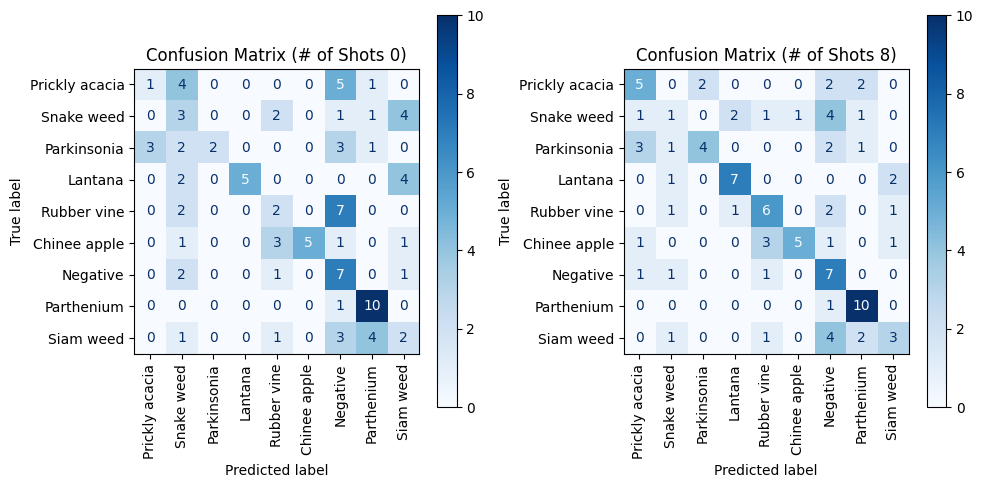

In [33]:
# NOTE: CHANGE 'label' TO 1 in csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the data
data_path = "12-deepweeds.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and its columns to verify structure
data.head(), data.columns

# Extract the ground truth and prediction columns
ground_truth = data['1'].astype('str')
predictions_0 = data['# of Shots 0'].astype('str')
predictions_1 = data['# of Shots 8'].astype('str')

# Generate the confusion matrices
cm_0 = confusion_matrix(ground_truth, predictions_0, labels=pd.unique(data['1']))
cm_1 = confusion_matrix(ground_truth, predictions_1, labels=pd.unique(data['1']))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first confusion matrix
disp_0 = ConfusionMatrixDisplay(confusion_matrix=cm_0, display_labels=pd.unique(data['1']))
disp_0.plot(cmap=plt.cm.Blues, ax=axs[0], xticks_rotation='vertical')
axs[0].set_title('Confusion Matrix (# of Shots 0)')

# Plot the second confusion matrix
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=pd.unique(data['1']))
disp_1.plot(cmap=plt.cm.Blues, ax=axs[1], xticks_rotation='vertical')
axs[1].set_title('Confusion Matrix (# of Shots 8)')

plt.tight_layout()
plt.show()

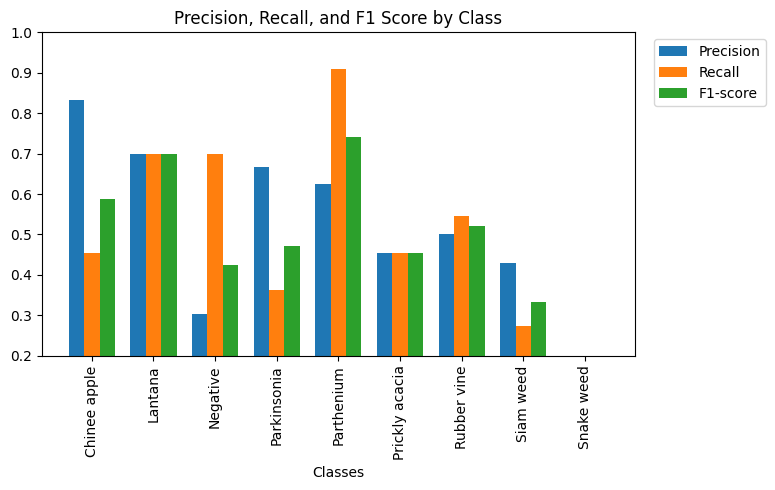

            Class  Precision    Recall  F1-score
0    Chinee apple   0.833333  0.454545  0.588235
1         Lantana   0.700000  0.700000  0.700000
2        Negative   0.304348  0.700000  0.424242
3     Parkinsonia   0.666667  0.363636  0.470588
4      Parthenium   0.625000  0.909091  0.740741
5  Prickly acacia   0.454545  0.454545  0.454545
6     Rubber vine   0.500000  0.545455  0.521739
7       Siam weed   0.428571  0.272727  0.333333
8      Snake weed   0.166667  0.090909  0.117647


In [37]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "12-deepweeds.csv"
data = pd.read_csv(data_path)

# Extract the ground truth and prediction columns
ground_truth = data['1'].astype(str)
predictions = data['# of Shots 8'].astype(str)

# Get the unique classes present in the ground truth
classes = np.unique(ground_truth)

# Create a dictionary to map ground truth classes to their indices
class_map = {cls: i for i, cls in enumerate(classes)}

# Map predictions to their corresponding class indices
mapped_predictions = [class_map.get(pred, -1) for pred in predictions]

# Get the indices where mapped_predictions is not equal to -1
valid_indices = np.where(np.array(mapped_predictions) != -1)[0]

# Remove predictions that are not in the class map
mapped_predictions = [mapped_predictions[i] for i in valid_indices]
ground_truth = ground_truth[valid_indices]

# Create a reverse dictionary to map indices back to class labels
reverse_class_map = {i: cls for i, cls in enumerate(classes)}

# Convert mapped_predictions back to class labels
mapped_predictions_labels = [reverse_class_map[pred] for pred in mapped_predictions]

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(ground_truth, mapped_predictions_labels, labels=classes, average=None)

# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(len(classes))
bar_width = 0.25

# Bar plots
ax.bar(index, precision, bar_width, label='Precision')
ax.bar(index + bar_width, recall, bar_width, label='Recall')
ax.bar(index + 2*bar_width, f1, bar_width, label='F1-score')

# Labeling and aesthetics
ax.set_xlabel('Classes')
ax.set_title('Precision, Recall, and F1 Score by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes, rotation=90)
ax.set_ylim(0.2, 1)  # Adjust y-axis
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Adjust the right spacing to accommodate the legend
plt.show()

# Create a dataframe with the metrics
metrics_df = pd.DataFrame({'Class': classes, 'Precision': precision, 'Recall': recall, 'F1-score': f1})
print(metrics_df)

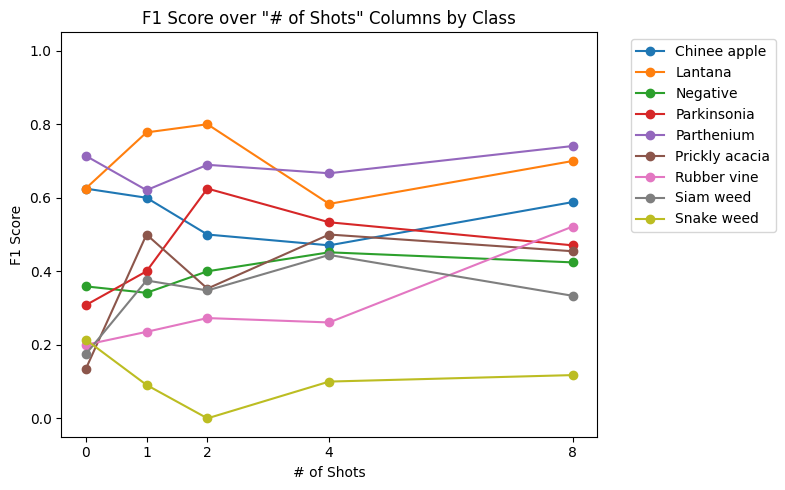

                # of Shots 0  # of Shots 1  # of Shots 2  # of Shots 4  \
Chinee apple        0.625000      0.600000      0.500000      0.470588   
Lantana             0.625000      0.777778      0.800000      0.583333   
Negative            0.358974      0.341463      0.400000      0.451613   
Parkinsonia         0.307692      0.400000      0.625000      0.533333   
Parthenium          0.714286      0.620690      0.689655      0.666667   
Prickly acacia      0.133333      0.500000      0.352941      0.500000   
Rubber vine         0.200000      0.235294      0.272727      0.260870   
Siam weed           0.173913      0.375000      0.347826      0.444444   
Snake weed          0.214286      0.090909      0.000000      0.100000   

                # of Shots 8  
Chinee apple        0.588235  
Lantana             0.700000  
Negative            0.424242  
Parkinsonia         0.470588  
Parthenium          0.740741  
Prickly acacia      0.454545  
Rubber vine         0.521739  
Siam weed  

In [35]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "12-deepweeds.csv"
data = pd.read_csv(data_path)

# Extract the ground truth column
ground_truth = data['1'].astype(str)

# Get the unique classes present in the ground truth
classes = np.unique(ground_truth)

# Create a dictionary to map ground truth classes to their indices
class_map = {cls: i for i, cls in enumerate(classes)}

# Initialize a list to store F1 scores for each "# of Shots" column
f1_scores = []

# Iterate over the "# of Shots" columns
for i in [0, 1, 2, 4, 8]:
    # Extract the prediction column
    predictions = data[f'# of Shots {i}'].astype(str)
    
    # Map predictions to their corresponding class indices
    mapped_predictions = [class_map.get(pred, -1) for pred in predictions]
    
    # Get the indices where mapped_predictions is not equal to -1
    valid_indices = np.where(np.array(mapped_predictions) != -1)[0]
    
    # Remove predictions that are not in the class map
    mapped_predictions = [mapped_predictions[i] for i in valid_indices]
    ground_truth_filtered = ground_truth[valid_indices]
    
    # Create a reverse dictionary to map indices back to class labels
    reverse_class_map = {i: cls for i, cls in enumerate(classes)}
    
    # Convert mapped_predictions back to class labels
    mapped_predictions_labels = [reverse_class_map[pred] for pred in mapped_predictions]
    
    # Calculate precision, recall, and F1-score
    _, _, f1, _ = precision_recall_fscore_support(ground_truth_filtered, mapped_predictions_labels, labels=classes, average=None)
    
    # Append the F1 scores to the list
    f1_scores.append(f1)

# Convert the list of F1 scores to a NumPy array
f1_scores = np.array(f1_scores)

# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))

# Plot F1 scores for each class over different "# of Shots" columns
for i, cls in enumerate(classes):
    ax.plot([0, 1, 2, 4, 8], f1_scores[:, i], marker='o', label=cls)

# Labeling and aesthetics
ax.set_xlabel('# of Shots')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score over "# of Shots" Columns by Class')
ax.set_xticks([0, 1, 2, 4, 8])
ax.set_xticklabels([f'{i}' for i in [0, 1, 2, 4, 8]])
ax.set_ylim(-0.05, 1.05)  # Adjust y-axis
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Now to get the printing
column_names = [f'# of Shots {i}' for i in [0, 1, 2, 4, 8]]

# Convert the F1 scores to a dictionary with class labels as keys
f1_scores_dict = {cls: scores for cls, scores in zip(classes, f1_scores.T)}

# Create the DataFrame
f1_scores_df = pd.DataFrame.from_dict(f1_scores_dict, orient='index', columns=column_names)

# Print the DataFrame
print(f1_scores_df)


# ip102

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# Load the data
data_path = "ip02-dataset-results.csv"
data = pd.read_csv(data_path)

# 1. Overall Accuracy Across Shots
accuracies = []
shot_numbers = [0, 1, 2, 4, 8]

for shots in shot_numbers:
    accuracies.append(accuracy_score(data['1'], data[f'# of Shots {shots}']))

plt.figure(figsize=(10, 6))
plt.plot(shot_numbers, accuracies, marker='o')
plt.title('Overall Accuracy vs Number of Shots')
plt.xlabel('Number of Shots')
plt.ylabel('Accuracy')
plt.xticks(shot_numbers)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# 2. Top N Classes Performance
N = 10  # Number of top classes to consider
top_classes = data['1'].value_counts().nlargest(N).index

# Calculate F1 score for each class and number of shots
f1_scores = {}
for shots in shot_numbers:
    precision, recall, f1, _ = precision_recall_fscore_support(
        data['1'], data[f'# of Shots {shots}'], labels=top_classes, average=None
    )
    f1_scores[shots] = dict(zip(top_classes, f1))

# Plot F1 scores for top N classes
plt.figure(figsize=(12, 6))
for cls in top_classes:
    plt.plot(shot_numbers, [f1_scores[shots][cls] for shots in shot_numbers], label=cls, marker='o')

plt.title(f'F1 Score for Top {N} Classes vs Number of Shots')
plt.xlabel('Number of Shots')
plt.ylabel('F1 Score')
plt.xticks(shot_numbers)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Confusion Matrix for Top N Classes (using 8-shot results)
y_true = data['1']
y_pred = data['# of Shots 8']

# Filter for top N classes
mask = y_true.isin(top_classes) & y_pred.isin(top_classes)
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

cm = confusion_matrix(y_true_filtered, y_pred_filtered, labels=top_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=top_classes, yticklabels=top_classes)
plt.title(f'Confusion Matrix for Top {N} Classes (8 Shots)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# 4. Summary Statistics
summary_stats = []
for shots in shot_numbers:
    precision, recall, f1, _ = precision_recall_fscore_support(
        data['1'], data[f'# of Shots {shots}'], average='weighted'
    )
    accuracy = accuracy_score(data['1'], data[f'# of Shots {shots}'])
    summary_stats.append({
        'Shots': shots,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

summary_df = pd.DataFrame(summary_stats)
print("Summary Statistics:")
print(summary_df.to_string(index=False))

# Additional: Class Distribution
plt.figure(figsize=(12, 6))
data['1'].value_counts().nlargest(N).plot(kind='bar')
plt.title(f'Distribution of Top {N} Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

TypeError: '<' not supported between instances of 'str' and 'float'

# Yellow Rust

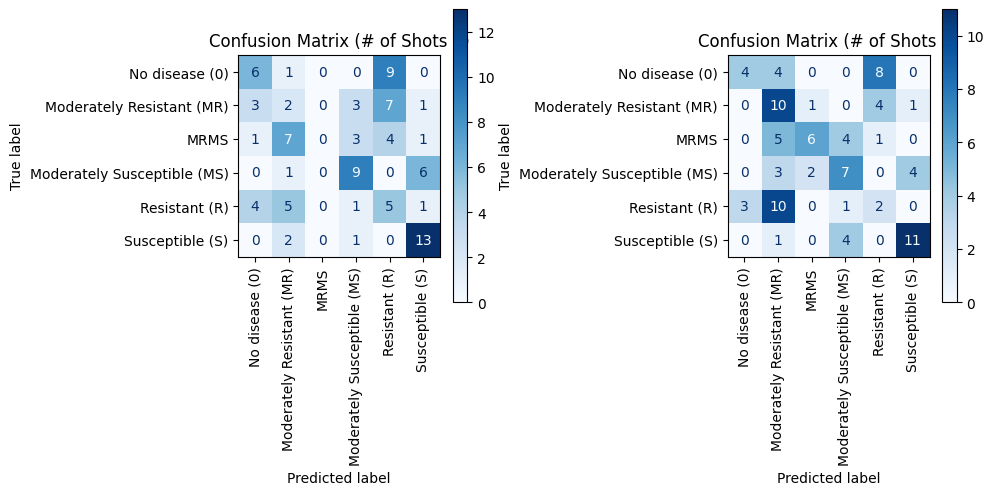

In [39]:
# NOTE: CHANGE 'label' TO 1 in csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the data
data_path = "YELLOW-RUST-19.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and its columns to verify structure
data.head(), data.columns

# Extract the ground truth and prediction columns
ground_truth = data['1'].astype('str')
predictions_0 = data['# of Shots 0'].astype('str')
predictions_1 = data['# of Shots 8'].astype('str')

# Generate the confusion matrices
cm_0 = confusion_matrix(ground_truth, predictions_0, labels=pd.unique(data['1']))
cm_1 = confusion_matrix(ground_truth, predictions_1, labels=pd.unique(data['1']))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first confusion matrix
disp_0 = ConfusionMatrixDisplay(confusion_matrix=cm_0, display_labels=pd.unique(data['1']))
disp_0.plot(cmap=plt.cm.Blues, ax=axs[0], xticks_rotation='vertical')
axs[0].set_title('Confusion Matrix (# of Shots 0)')

# Plot the second confusion matrix
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=pd.unique(data['1']))
disp_1.plot(cmap=plt.cm.Blues, ax=axs[1], xticks_rotation='vertical')
axs[1].set_title('Confusion Matrix (# of Shots 8)')

plt.tight_layout()
plt.show()

Confusion matrix shape (0 shots): (6, 6)
Confusion matrix shape (8 shots): (6, 6)
Cost matrix shape: (6, 6)
Misclassification cost (0 shots): 0.9062
Misclassification cost (8 shots): 0.7292


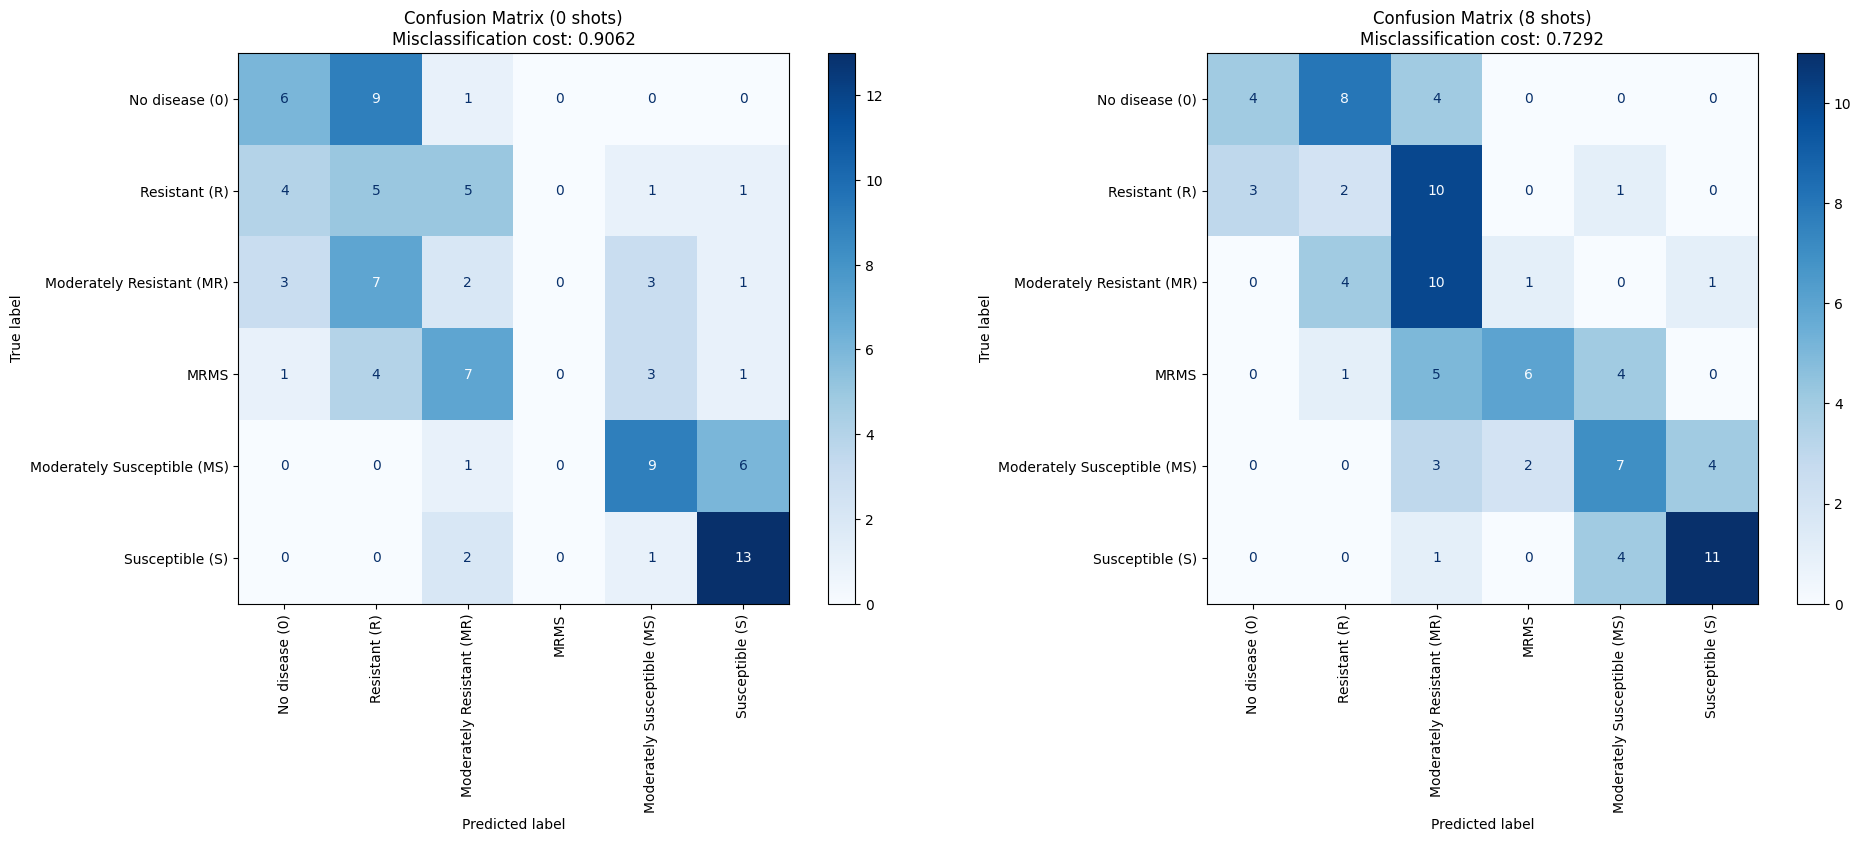

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the data
data_path = "YELLOW-RUST-19.csv"
data = pd.read_csv(data_path)

# Extract the ground truth and prediction columns
ground_truth = data['1']
predictions_0 = data['# of Shots 0']
predictions_8 = data['# of Shots 8']

# Define the order of severity for the labels
severity_order = [
    'No disease (0)',
    'Resistant (R)',
    'Moderately Resistant (MR)',
    'MRMS',
    'Moderately Susceptible (MS)',
    'Susceptible (S)'
]

# Create a mapping from labels to severity indices
label_to_index = {label: index for index, label in enumerate(severity_order)}

# Generate the confusion matrices
labels = severity_order
cm_0 = confusion_matrix(ground_truth, predictions_0, labels=labels)
cm_8 = confusion_matrix(ground_truth, predictions_8, labels=labels)

print("Confusion matrix shape (0 shots):", cm_0.shape)
print("Confusion matrix shape (8 shots):", cm_8.shape)

# Define the cost matrix based on the difference in severity indices
n_labels = len(labels)
cost_matrix = np.zeros((n_labels, n_labels))
for i in range(n_labels):
    for j in range(n_labels):
        cost_matrix[i, j] = abs(i - j)

print("Cost matrix shape:", cost_matrix.shape)

def calculate_misclassification_cost(cm, cost_matrix):
    N = np.sum(cm)  # Total number of observations
    cost = np.sum(cm * cost_matrix) / N
    return cost

# Calculate misclassification costs
cost_0 = calculate_misclassification_cost(cm_0, cost_matrix)
cost_8 = calculate_misclassification_cost(cm_8, cost_matrix)

print(f"Misclassification cost (0 shots): {cost_0:.4f}")
print(f"Misclassification cost (8 shots): {cost_8:.4f}")

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first confusion matrix
disp_0 = ConfusionMatrixDisplay(confusion_matrix=cm_0, display_labels=labels)
disp_0.plot(cmap=plt.cm.Blues, ax=axs[0], xticks_rotation='vertical')
axs[0].set_title(f'Confusion Matrix (0 shots)\nMisclassification cost: {cost_0:.4f}')

# Plot the second confusion matrix
disp_8 = ConfusionMatrixDisplay(confusion_matrix=cm_8, display_labels=labels)
disp_8.plot(cmap=plt.cm.Blues, ax=axs[1], xticks_rotation='vertical')
axs[1].set_title(f'Confusion Matrix (8 shots)\nMisclassification cost: {cost_8:.4f}')

plt.tight_layout()
plt.show()

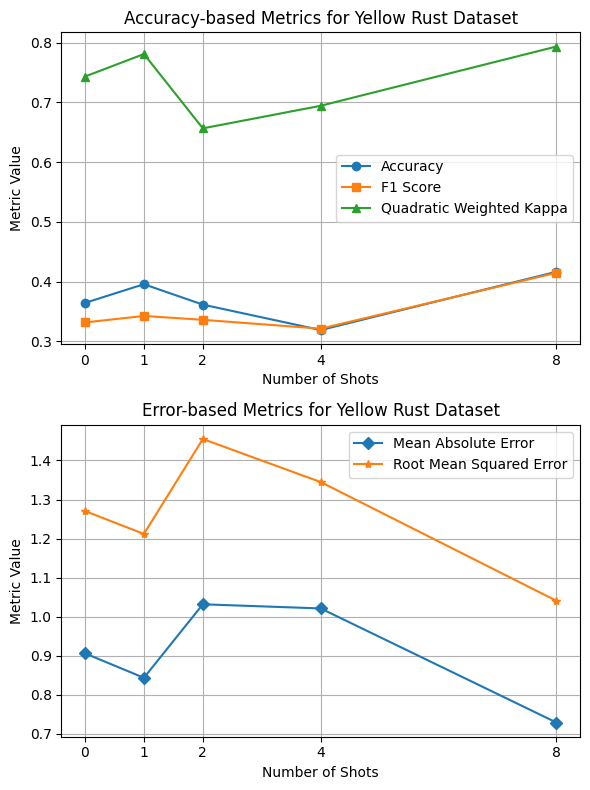

Metrics for each shot:

Shot 0:
Accuracy: 0.3646
F1 Score: 0.3319
Quadratic Weighted Kappa: 0.7434
Mean Absolute Error: 0.9062
Root Mean Squared Error: 1.2707

Shot 1:
Accuracy: 0.3958
F1 Score: 0.3427
Quadratic Weighted Kappa: 0.7811
Mean Absolute Error: 0.8438
Root Mean Squared Error: 1.2119

Shot 2:
Accuracy: 0.3617
F1 Score: 0.3363
Quadratic Weighted Kappa: 0.6567
Mean Absolute Error: 1.0319
Root Mean Squared Error: 1.4550

Shot 4:
Accuracy: 0.3191
F1 Score: 0.3215
Quadratic Weighted Kappa: 0.6945
Mean Absolute Error: 1.0213
Root Mean Squared Error: 1.3448

Shot 8:
Accuracy: 0.4167
F1 Score: 0.4150
Quadratic Weighted Kappa: 0.7937
Mean Absolute Error: 0.7292
Root Mean Squared Error: 1.0408


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data
data_path = "YELLOW-RUST-19.csv"
data = pd.read_csv(data_path)

# Define the order of severity for the labels
severity_order = [
    'No disease (0)',
    'Resistant (R)',
    'Moderately Resistant (MR)',
    'MRMS',
    'Moderately Susceptible (MS)',
    'Susceptible (S)'
]

# Create a mapping from labels to severity indices
label_to_index = {label: index for index, label in enumerate(severity_order)}

# Convert ground truth to numeric values
y_true = data['1'].map(label_to_index)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    # Remove rows with NaN values
    mask = ~np.isnan(y_pred)
    y_true_clean = y_true[mask]
    y_pred_clean = y_pred[mask]
    
    accuracy = accuracy_score(y_true_clean, y_pred_clean)
    f1 = f1_score(y_true_clean, y_pred_clean, average='weighted')
    kappa = cohen_kappa_score(y_true_clean, y_pred_clean, weights='quadratic')
    mae = mean_absolute_error(y_true_clean, y_pred_clean)
    mse = mean_squared_error(y_true_clean, y_pred_clean)
    rmse = np.sqrt(mse)
    return accuracy, f1, kappa, mae, rmse

# Calculate metrics for each shot
shots = [0, 1, 2, 4, 8]
metrics = []

for shot in shots:
    y_pred = data[f'# of Shots {shot}'].map(label_to_index)
    metrics.append(calculate_metrics(y_true, y_pred))

# Unpack metrics
accuracies, f1_scores, kappas, maes, rmses = zip(*metrics)

# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

# Plot 1: Accuracy-based metrics
ax1.plot(shots, accuracies, marker='o', label='Accuracy')
ax1.plot(shots, f1_scores, marker='s', label='F1 Score')
ax1.plot(shots, kappas, marker='^', label='Quadratic Weighted Kappa')

ax1.set_title('Accuracy-based Metrics for Yellow Rust Dataset')
ax1.set_xlabel('Number of Shots')
ax1.set_ylabel('Metric Value')
ax1.legend()
ax1.grid(True)
ax1.set_xticks(shots)

# Add value labels for accuracy-based metrics
# for i, shot in enumerate(shots):
#     ax1.text(shot, accuracies[i], f'{accuracies[i]:.2f}', ha='center', va='bottom')
#     ax1.text(shot, f1_scores[i], f'{f1_scores[i]:.2f}', ha='center', va='bottom')
#     ax1.text(shot, kappas[i], f'{kappas[i]:.2f}', ha='center', va='top')

# Plot 2: Error-based metrics
ax2.plot(shots, maes, marker='D', label='Mean Absolute Error')
ax2.plot(shots, rmses, marker='*', label='Root Mean Squared Error')

ax2.set_title('Error-based Metrics for Yellow Rust Dataset')
ax2.set_xlabel('Number of Shots')
ax2.set_ylabel('Metric Value')
ax2.legend()
ax2.grid(True)
ax2.set_xticks(shots)

# Add value labels for error-based metrics
# for i, shot in enumerate(shots):
#     ax2.text(shot, maes[i], f'{maes[i]:.2f}', ha='center', va='bottom')
#     ax2.text(shot, rmses[i], f'{rmses[i]:.2f}', ha='center', va='top')

plt.tight_layout()
plt.show()

# Print the metrics
print("Metrics for each shot:")
for i, shot in enumerate(shots):
    print(f"\nShot {shot}:")
    print(f"Accuracy: {accuracies[i]:.4f}")
    print(f"F1 Score: {f1_scores[i]:.4f}")
    print(f"Quadratic Weighted Kappa: {kappas[i]:.4f}")
    print(f"Mean Absolute Error: {maes[i]:.4f}")
    print(f"Root Mean Squared Error: {rmses[i]:.4f}")

# Overall


/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


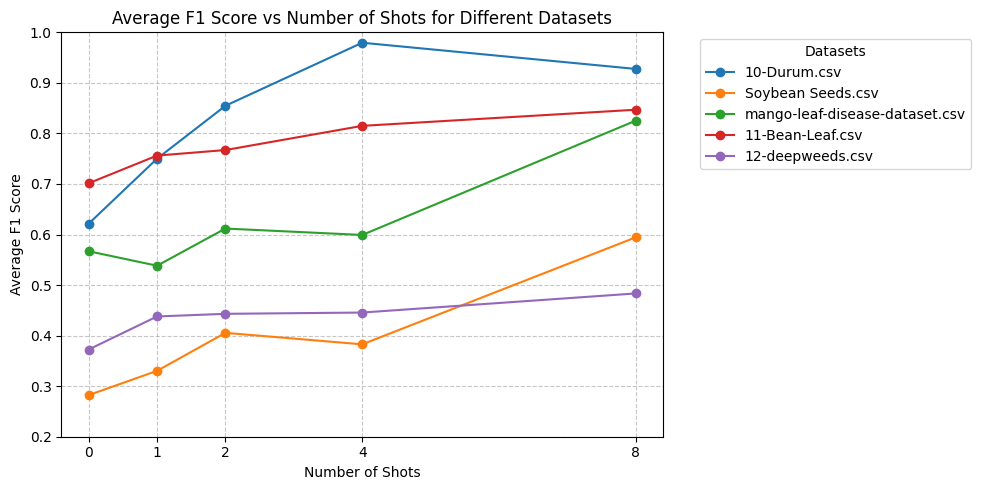

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

def plot_f1_scores(file_names):
    plt.figure(figsize=(10, 5))
    
    for file_name in file_names:
        # Load the data
        data = pd.read_csv(file_name)
        
        # Extract the ground truth column
        ground_truth = data['1'].astype(str)
        
        # Get the unique classes present in the ground truth
        classes = np.unique(ground_truth)
        
        # Create a dictionary to map ground truth classes to their indices
        class_map = {cls: i for i, cls in enumerate(classes)}
        
        # Initialize a list to store average F1 scores for each "# of Shots" column
        avg_f1_scores = []
        
        # Iterate over the "# of Shots" columns
        for i in [0, 1, 2, 4, 8]:
            # Extract the prediction column
            predictions = data[f'# of Shots {i}'].astype(str)
            
            # Map predictions to their corresponding class indices
            mapped_predictions = [class_map.get(pred, -1) for pred in predictions]
            
            # Get the indices where mapped_predictions is not equal to -1
            valid_indices = np.where(np.array(mapped_predictions) != -1)[0]
            
            # Remove predictions that are not in the class map
            mapped_predictions = [mapped_predictions[i] for i in valid_indices]
            ground_truth_filtered = ground_truth[valid_indices]
            
            # Create a reverse dictionary to map indices back to class labels
            reverse_class_map = {i: cls for i, cls in enumerate(classes)}
            
            # Convert mapped_predictions back to class labels
            mapped_predictions_labels = [reverse_class_map[pred] for pred in mapped_predictions]
            
            # Calculate precision, recall, and F1-score
            _, _, f1, _ = precision_recall_fscore_support(ground_truth_filtered, mapped_predictions_labels, labels=classes, average='macro')
            
            # Append the average F1 score to the list
            avg_f1_scores.append(f1)
        
        # Plot average F1 scores for the dataset
        plt.plot([0, 1, 2, 4, 8], avg_f1_scores, marker='o', label=file_name)
    
    # Labeling and aesthetics
    plt.xlabel('Number of Shots')
    plt.ylabel('Average F1 Score')
    plt.title('Average F1 Score vs Number of Shots for Different Datasets')
    plt.xticks([0, 1, 2, 4, 8])
    plt.ylim(0.2, 1)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Datasets', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig("analysis/shots vs overall f1.png")
    plt.show()

# Example usage
file_names = [ "10-Durum.csv","Soybean Seeds.csv", "mango-leaf-disease-dataset.csv"  ,"11-Bean-Leaf.csv", "12-deepweeds.csv"]
plot_f1_scores(file_names)